베스트셀러_최종버전12.csv
비베스트셀러_최종버전11.csv

In [2]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전12.csv')
df1 = pd.read_csv('비베스트셀러_최종버전11.csv')

# 영풍의 베스트셀러가 매우 인기있는 도서라는 걸 증명할 데이터 필요

In [12]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [13]:
# yp_best가 1인 책만 필터링
yp_best_df = df[df['yp_best'] == 1]

# 전체 개수
total = len(yp_best_df)

# 다른 best 열의 비율 계산
kyobo_ratio = (yp_best_df['kyobo_best'] == 1).sum() / total
aladin_ratio = (yp_best_df['aladin_best'] == 1).sum() / total
yes24_ratio = (yp_best_df['yes24_best'] == 1).sum() / total

# 결과 출력
print(f"yp_best가 1인 책 중에서:")
print(f"  - kyobo_best도 1인 비율: {kyobo_ratio:.2%}")
print(f"  - aladin_best도 1인 비율: {aladin_ratio:.2%}")
print(f"  - yes24_best도 1인 비율: {yes24_ratio:.2%}")


yp_best가 1인 책 중에서:
  - kyobo_best도 1인 비율: 79.20%
  - aladin_best도 1인 비율: 56.79%
  - yes24_best도 1인 비율: 56.91%


In [14]:
# 분석할 열 목록
rating_cols = ['kyobo_rating', 'aladin_rating', 'yes24_rating']
score_cols = ['kyobo_score', 'aladin_score', 'yes24_score']

# yp_best == 1인 책과 아닌 책을 나눔
yp_best_books = df[df['yp_best'] == 1]
non_yp_best_books = df[df['yp_best'] == 0]

# 결과를 저장할 딕셔너리
result = {}

# 각 플랫폼별로 rating과 score 평균 비교
for col in rating_cols + score_cols:
    result[col] = {
        'yp_best': yp_best_books[col].mean(),
        'non_yp_best': non_yp_best_books[col].mean()
    }

# 보기 좋게 출력
import pandas as pd
result_df = pd.DataFrame(result).T
result_df.columns = ['yp_best_avg', 'non_yp_best_avg']
print(result_df)


               yp_best_avg  non_yp_best_avg
kyobo_rating      4.487273         4.572870
aladin_rating     4.298630         4.442488
yes24_rating      2.739956         2.384292
kyobo_score       8.526613         4.338581
aladin_score      3.958823         3.310034
yes24_score       4.063344         2.687390


In [19]:
# 영풍 평점이 다른 플랫폼보다 월등히 높은 책 추출
threshold = 1.0  # 점수 차이 기준 (예: 2점 이상 차이)
df_yp_only_high = df[
    (df['yp_score'] > df['kyobo_score'] + threshold) &
    (df['yp_score'] > df['aladin_score'] + threshold) &
    (df['yp_score'] > df['yes24_score'] + threshold)
]


In [ ]:
print(df_yp_only_high['CLASS_NO'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
print(df_yp_only_high['PUBLER'].value_counts().head(10))

Series([], Name: count, dtype: int64)


In [20]:
df_yp_only_high

,TITLE,AUTHOR,PUBLER,CLASS_NO,PUBLER_YEAR,PAGE,ISBN,kyobo_best,aladin_best,yes24_best,...,yp_pnscore,yp_review,yp_rating,yp_score,yes24_po,yes24_ne,yes24_pnscore,yes24_review,yes24_rating,yes24_score
1326,이제는 똘똘한 아파트 한 채가 답이다,김경필,원앤원북스,경제학,2020,287.0,9791170430544,1.0,0.0,0.0,...,0.86,58.0,4.21,5.22,15.0,10.0,0.6,25.0,4.92,3.76


In [22]:
import pandas as pd

# 가정: df가 이미 데이터프레임으로 존재한다고 가정

# 1. yp_best가 1인 도서만 필터링
yp_best_df = df[df['yp_best'] == 1]

# 2. 각 플랫폼의 pnscore 컬럼만 선택
pnscore_cols = ['kyobo_pnscore', 'aladin_pnscore', 'yes24_pnscore', 'yp_pnscore']

# 3. 필터링된 데이터에서 해당 컬럼들만 선택
pnscore_data = yp_best_df[pnscore_cols]

# 4. 간단히 평균을 비교해 보기 (평균값으로 각 플랫폼 pnscore 비교)
mean_scores = pnscore_data.mean()

print("yp_best가 1인 도서의 각 플랫폼 pnscore 평균 비교:")
print(mean_scores)


yp_best가 1인 도서의 각 플랫폼 pnscore 평균 비교:
kyobo_pnscore     0.833294
aladin_pnscore    0.745772
yes24_pnscore     0.586488
yp_pnscore        0.290511
dtype: float64


In [39]:
pnscore_data.describe()

,kyobo_pnscore,aladin_pnscore,yes24_pnscore,yp_pnscore
count,1606.000000,1606.000000,1606.000000,1606.000000
mean,0.833294,0.745772,0.586488,0.290511
std,0.232554,0.240644,0.410229,0.445249
min,0.000000,0.000000,0.000000,0.000000
25%,0.840000,0.650000,0.000000,0.000000
50%,0.900000,0.800000,0.820000,0.000000
75%,0.940000,0.920000,0.907500,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [25]:
df[df['yp_best'] == 1]['CLASS_NO'].value_counts()

CLASS_NO
경제학                     390
한국문학                    383
일본문학                    110
영미문학                     65
심리학                      65
문학                       49
윤리학, 도덕철학                46
사회학, 사회문제                41
지리                       40
자연과학                     36
가정학 및 가정생활               28
아시아(아세아)                 28
의학                       26
역사                       25
정치학                      25
생물과학                     23
교육학                      19
프랑스문학                    17
총류                       15
한국어                      14
독일문학                     14
서양철학                     14
비교종교학                    13
풍속, 민속학                  10
법학                       10
중국문학                     10
전기                        8
불교                        7
동양 철학, 사상                 7
오락, 운동                    7
동물학                       7
백과사전                      6
철학                        6
영어                        5
공학, 공업일반, 토목공학, 환경공학      4
공예         

In [ ]:
df[(df['yp_best'] == 1) & (df['yp_pnscore'] < 100)]['ISBN']

1       9788932020006
2       9788956604992
11      9788972756194
13      9788992647595
18      9788954616515
            ...      
5133    9791192097978
5135    9791171178582
5139    9791169238441
5141    9791171712946
5142    9788936443368
Name: ISBN, Length: 1606, dtype: int64

결과적으로 영풍의 베스트셀러는 초인기도서가 아니었다...

# 베스트셀러 등극횟수를 파악해 각 플랫폼별 중복 베스트셀러 등재율이 다르단 데이터 필요

In [27]:
asd = pd.read_csv('리뷰최종_영풍베스트.csv')
asd

,isbn,review,rating,sentiment,sentiment_score
0,9788937460197,어딘지 모르는 무인도에 랠프일행을 태운 비행기의 일부분이 추락했다 금발의 소년인 랠...,5,긍정,95.89
1,9788983945068,부담없이 청소년기 딸과 함께 읽을 수 있는 이야기로 추천할 도서입니다,5,긍정,94.23
2,9788932020006,한강작가님의 작품 잘 읽었네요,5,긍정,82.23
3,9788932020006,한강의 바람이 분다 가라는 상실과 기억 그리고 그리움의 파편들로 엮인 작품이다 소설...,5,긍정,99.74
4,9788932020006,한강 작가님 책 중 젤 첫번째 읽고 신선한 충격이었던 바람이 분다 가라 인생사 희로...,5,긍정,94.16
...,...,...,...,...,...
2944,9791171712946,1권을 너무 재미있게 읽어서 2권 나온거 알고 자기 용돈으로 바로 구매했습니다 용돈...,5,긍정,98.52
2945,9791171712946,아이가 재미있다고 좋아하네요 3권도 사줘야겠네요,5,긍정,91.06
2946,9788936443368,와니니 신작은 언제쯤,4,부정,64.74
2947,9791164052578,허브와독초 웨일즈인과 잉글랜드 의 묘한 지배 피지배 관계 상속자 유산 캐드펠의 첫사...,5,긍정,93.83


In [32]:
df[(df['yp_best'] == 1) & (df['yp_pnscore'] < 100)]['ISBN']

1       9788932020006
2       9788956604992
11      9788972756194
13      9788992647595
18      9788954616515
            ...      
5133    9791192097978
5135    9791171178582
5139    9791169238441
5141    9791171712946
5142    9788936443368
Name: ISBN, Length: 1606, dtype: int64

In [37]:
asd[asd['isbn'] == 9791171712946]

,isbn,review,rating,sentiment,sentiment_score
2941,9791171712946,재밌습니다재밌습니다,5,긍정,99.54
2942,9791171712946,인체에 대해 재밌는 만화와 글귀로 재미있게 잘 읽었습니다,5,긍정,93.06
2943,9791171712946,아이가 재밌게 읽고 있어요,5,긍정,94.51
2944,9791171712946,1권을 너무 재미있게 읽어서 2권 나온거 알고 자기 용돈으로 바로 구매했습니다 용돈...,5,긍정,98.52
2945,9791171712946,아이가 재미있다고 좋아하네요 3권도 사줘야겠네요,5,긍정,91.06


In [46]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [48]:
df = df[['ISBN', 'CLASS_NO', 'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best','kyobo_score','aladin_score','yp_score','yes24_score']]

In [49]:
df

,ISBN,CLASS_NO,kyobo_best,aladin_best,yes24_best,yp_best,kyobo_score,aladin_score,yp_score,yes24_score
0,9788956605418,영미문학,0.0,1.0,1.0,0.0,16.14,7.38,0.00,8.04
1,9788932020006,한국문학,1.0,0.0,1.0,1.0,8.02,4.72,2.95,7.14
2,9788956604992,한국문학,1.0,1.0,1.0,1.0,19.00,10.20,2.69,7.17
3,9788954617383,한국문학,0.0,1.0,0.0,0.0,3.20,4.43,0.00,3.48
4,9788937886966,"윤리학, 도덕철학",1.0,1.0,1.0,0.0,13.32,2.97,0.00,7.76
...,...,...,...,...,...,...,...,...,...,...
5138,9791194087588,가정학 및 가정생활,0.0,1.0,0.0,0.0,2.88,3.05,0.00,0.00
5139,9791169238441,한국문학,0.0,0.0,0.0,1.0,3.04,2.60,0.00,0.00
5140,9791168731349,음악,0.0,1.0,0.0,0.0,3.20,2.62,0.00,0.00
5141,9791171712946,의학,1.0,0.0,1.0,1.0,4.12,2.90,3.00,0.00


In [50]:
test = pd.read_csv('교보순위.csv')
test1 = pd.read_csv('yes24_순위.csv')
test2 = pd.read_csv('알라딘_순위_진짜제발최종.csv')
test3 = pd.read_csv('영풍_순위.csv')

In [54]:
test3

,ISBN,count
0,9791187142560,60
1,9791158883591,60
2,9791157280292,56
3,9788998441012,55
4,9791188331796,54
...,...,...
2832,9791192504346,1
2833,9791140709892,1
2834,9788915999879,1
2835,9788936446734,1


In [64]:
# 1. 딕셔너리로 변환
test_dict = test3.set_index('ISBN')['count'].to_dict()

# 2. map()에 적용
df['yp_best_count'] = df['ISBN'].map(test_dict)
df

C:\Users\user\AppData\Local\Temp\ipykernel_4680\158941646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yp_best_count'] = df['ISBN'].map(test_dict)


,ISBN,CLASS_NO,kyobo_best,aladin_best,yes24_best,yp_best,kyobo_score,aladin_score,yp_score,yes24_score,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
0,9788956605418,영미문학,0.0,1.0,1.0,0.0,16.14,7.38,0.00,8.04,NaN,2.0,NaN,NaN
1,9788932020006,한국문학,1.0,0.0,1.0,1.0,8.02,4.72,2.95,7.14,3.0,6.0,NaN,3.0
2,9788956604992,한국문학,1.0,1.0,1.0,1.0,19.00,10.20,2.69,7.17,3.0,4.0,NaN,3.0
3,9788954617383,한국문학,0.0,1.0,0.0,0.0,3.20,4.43,0.00,3.48,NaN,NaN,NaN,NaN
4,9788937886966,"윤리학, 도덕철학",1.0,1.0,1.0,0.0,13.32,2.97,0.00,7.76,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,9791194087588,가정학 및 가정생활,0.0,1.0,0.0,0.0,2.88,3.05,0.00,0.00,NaN,NaN,NaN,NaN
5139,9791169238441,한국문학,0.0,0.0,0.0,1.0,3.04,2.60,0.00,0.00,NaN,NaN,NaN,1.0
5140,9791168731349,음악,0.0,1.0,0.0,0.0,3.20,2.62,0.00,0.00,NaN,NaN,NaN,NaN
5141,9791171712946,의학,1.0,0.0,1.0,1.0,4.12,2.90,3.00,0.00,2.0,2.0,NaN,2.0


In [68]:
df.fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4680\4231983114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [69]:
df

,ISBN,CLASS_NO,kyobo_best,aladin_best,yes24_best,yp_best,kyobo_score,aladin_score,yp_score,yes24_score,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
0,9788956605418,영미문학,0.0,1.0,1.0,0.0,16.14,7.38,0.00,8.04,0.0,2.0,0.0,0.0
1,9788932020006,한국문학,1.0,0.0,1.0,1.0,8.02,4.72,2.95,7.14,3.0,6.0,0.0,3.0
2,9788956604992,한국문학,1.0,1.0,1.0,1.0,19.00,10.20,2.69,7.17,3.0,4.0,0.0,3.0
3,9788954617383,한국문학,0.0,1.0,0.0,0.0,3.20,4.43,0.00,3.48,0.0,0.0,0.0,0.0
4,9788937886966,"윤리학, 도덕철학",1.0,1.0,1.0,0.0,13.32,2.97,0.00,7.76,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,9791194087588,가정학 및 가정생활,0.0,1.0,0.0,0.0,2.88,3.05,0.00,0.00,0.0,0.0,0.0,0.0
5139,9791169238441,한국문학,0.0,0.0,0.0,1.0,3.04,2.60,0.00,0.00,0.0,0.0,0.0,1.0
5140,9791168731349,음악,0.0,1.0,0.0,0.0,3.20,2.62,0.00,0.00,0.0,0.0,0.0,0.0
5141,9791171712946,의학,1.0,0.0,1.0,1.0,4.12,2.90,3.00,0.00,2.0,2.0,0.0,2.0


In [70]:
df['kyobo_best_count'].value_counts()

kyobo_best_count
0.0     2408
1.0     1124
2.0      706
3.0      301
4.0      182
5.0      116
6.0       61
7.0       41
8.0       29
9.0       19
10.0      17
12.0      15
13.0      14
15.0      10
11.0       9
16.0       9
14.0       9
19.0       7
21.0       6
17.0       5
31.0       5
18.0       5
22.0       4
20.0       4
25.0       4
60.0       3
28.0       3
27.0       3
34.0       2
35.0       2
26.0       2
55.0       2
23.0       2
37.0       1
51.0       1
39.0       1
53.0       1
47.0       1
56.0       1
58.0       1
43.0       1
50.0       1
42.0       1
32.0       1
41.0       1
36.0       1
44.0       1
Name: count, dtype: int64

In [71]:
df.columns

Index(['ISBN', 'CLASS_NO', 'kyobo_best', 'aladin_best', 'yes24_best',
       'yp_best', 'kyobo_score', 'aladin_score', 'yp_score', 'yes24_score',
       'kyobo_best_count', 'yes24_best_count', 'aladin_best_count',
       'yp_best_count'],
      dtype='object')

In [72]:
df.drop(['kyobo_best', 'aladin_best', 'yes24_best',
       'yp_best'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4680\3489604465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['kyobo_best', 'aladin_best', 'yes24_best',


In [74]:
df.to_csv('베스트등극횟수.csv', index=False)

In [75]:
df = pd.read_csv('베스트셀러_최종버전12.csv')

In [77]:
df['kyobo_score'].value_counts()

kyobo_score
0.00     286
3.10      52
2.90      51
3.15      48
3.20      47
        ... 
16.64      1
14.19      1
13.22      1
23.33      1
8.05       1
Name: count, Length: 1135, dtype: int64

In [82]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [83]:
df[(df['kyobo_score'] == 16) | (df['kyobo_score'] == 15)][['kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score']]

,kyobo_po,kyobo_ne,kyobo_pnscore,kyobo_review,kyobo_rating,kyobo_score
485,243.0,24.0,0.91,267.0,4.87,16.0
2941,222.0,25.0,0.90,247.0,4.88,15.0


In [84]:
test2

,ISBN,count
0,9791187142560,43
1,9788937461033,43
2,9788934972464,43
3,9788983711892,42
4,9788936811549,42
...,...,...
6222,9791136791238,1
6223,9791169850919,1
6224,9788927712459,1
6225,9791130671048,1


In [85]:
df = pd.read_csv('베스트등극횟수.csv')

In [86]:
# 1. 딕셔너리로 변환
test_dict = test2.set_index('ISBN')['count'].to_dict()

# 2. map()에 적용
df['aladin_best_count'] = df['ISBN'].map(test_dict)
df

,ISBN,CLASS_NO,kyobo_score,aladin_score,yp_score,yes24_score,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
0,9788956605418,영미문학,16.14,7.38,0.00,8.04,0.0,2.0,NaN,0.0
1,9788932020006,한국문학,8.02,4.72,2.95,7.14,3.0,6.0,NaN,3.0
2,9788956604992,한국문학,19.00,10.20,2.69,7.17,3.0,4.0,NaN,3.0
3,9788954617383,한국문학,3.20,4.43,0.00,3.48,0.0,0.0,NaN,0.0
4,9788937886966,"윤리학, 도덕철학",13.32,2.97,0.00,7.76,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
5138,9791194087588,가정학 및 가정생활,2.88,3.05,0.00,0.00,0.0,0.0,NaN,0.0
5139,9791169238441,한국문학,3.04,2.60,0.00,0.00,0.0,0.0,NaN,1.0
5140,9791168731349,음악,3.20,2.62,0.00,0.00,0.0,0.0,NaN,0.0
5141,9791171712946,의학,4.12,2.90,3.00,0.00,2.0,2.0,NaN,2.0


In [91]:
asd = pd.concat([test, test2])

In [ ]:
asd = test['ISBN']
qwe = test2['ISBN']

zxc = pd.concat([asd.qwe])

AttributeError: 'Series' object has no attribute 'qwe'

In [93]:
df = pd.read_csv('알라딘_월간_제발최종.csv')
df

,순번/순위,ISBN
0,1,9791136745118
1,2,9788959897001
2,3,9791160406504
3,5,9788954682152
4,6,9791165343729
...,...,...
11995,401,9791168418011
11996,402,9791193358689
11997,403,9788934981213
11998,404,9791158883591


In [94]:
df['ISBN'].value_counts()

ISBN
9791187142560    43
9788937461033    43
9788934972464    43
9788983711892    42
9788936811549    42
                 ..
9791136791238     1
9791169850919     1
9788927712459     1
9791130671048     1
9791171177295     1
Name: count, Length: 6227, dtype: int64

In [95]:
test2

,ISBN,count
0,9791187142560,43
1,9788937461033,43
2,9788934972464,43
3,9788983711892,42
4,9788936811549,42
...,...,...
6222,9791136791238,1
6223,9791169850919,1
6224,9788927712459,1
6225,9791130671048,1


In [97]:
df = pd.read_csv('베스트셀러_최종버전12.csv')

In [99]:
df['aladin_best'].value_counts()

aladin_best
1.0    3605
0.0    1538
Name: count, dtype: int64

In [102]:
df = pd.read_csv('베스트등극횟수.csv')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5143 non-null   int64  
 1   CLASS_NO           5143 non-null   object 
 2   kyobo_score        5143 non-null   float64
 3   aladin_score       5143 non-null   float64
 4   yp_score           5143 non-null   float64
 5   yes24_score        5143 non-null   float64
 6   kyobo_best_count   5143 non-null   float64
 7   yes24_best_count   5143 non-null   float64
 8   aladin_best_count  5143 non-null   float64
 9   yp_best_count      5143 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 401.9+ KB


In [100]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6227 entries, 0 to 6226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    6227 non-null   object
 1   count   6227 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 97.4+ KB


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5143 non-null   int64  
 1   CLASS_NO           5143 non-null   object 
 2   kyobo_score        5143 non-null   float64
 3   aladin_score       5143 non-null   float64
 4   yp_score           5143 non-null   float64
 5   yes24_score        5143 non-null   float64
 6   kyobo_best_count   5143 non-null   float64
 7   yes24_best_count   5143 non-null   float64
 8   aladin_best_count  5143 non-null   float64
 9   yp_best_count      5143 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 401.9+ KB


In [107]:
df['ISBN'] = df['ISBN'].astype(str)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5143 non-null   object 
 1   CLASS_NO           5143 non-null   object 
 2   kyobo_score        5143 non-null   float64
 3   aladin_score       5143 non-null   float64
 4   yp_score           5143 non-null   float64
 5   yes24_score        5143 non-null   float64
 6   kyobo_best_count   5143 non-null   float64
 7   yes24_best_count   5143 non-null   float64
 8   aladin_best_count  5143 non-null   float64
 9   yp_best_count      5143 non-null   float64
dtypes: float64(8), object(2)
memory usage: 401.9+ KB


In [109]:
# 1. 딕셔너리로 변환
test_dict = test2.set_index('ISBN')['count'].to_dict()

# 2. map()에 적용
df['aladin_best_count'] = df['ISBN'].map(test_dict)
df

,ISBN,CLASS_NO,kyobo_score,aladin_score,yp_score,yes24_score,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
0,9788956605418,영미문학,16.14,7.38,0.00,8.04,0.0,2.0,2.0,0.0
1,9788932020006,한국문학,8.02,4.72,2.95,7.14,3.0,6.0,NaN,3.0
2,9788956604992,한국문학,19.00,10.20,2.69,7.17,3.0,4.0,3.0,3.0
3,9788954617383,한국문학,3.20,4.43,0.00,3.48,0.0,0.0,2.0,0.0
4,9788937886966,"윤리학, 도덕철학",13.32,2.97,0.00,7.76,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5138,9791194087588,가정학 및 가정생활,2.88,3.05,0.00,0.00,0.0,0.0,1.0,0.0
5139,9791169238441,한국문학,3.04,2.60,0.00,0.00,0.0,0.0,NaN,1.0
5140,9791168731349,음악,3.20,2.62,0.00,0.00,0.0,0.0,1.0,0.0
5141,9791171712946,의학,4.12,2.90,3.00,0.00,2.0,2.0,NaN,2.0


In [110]:
df.fillna(0)

,ISBN,CLASS_NO,kyobo_score,aladin_score,yp_score,yes24_score,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
0,9788956605418,영미문학,16.14,7.38,0.00,8.04,0.0,2.0,2.0,0.0
1,9788932020006,한국문학,8.02,4.72,2.95,7.14,3.0,6.0,0.0,3.0
2,9788956604992,한국문학,19.00,10.20,2.69,7.17,3.0,4.0,3.0,3.0
3,9788954617383,한국문학,3.20,4.43,0.00,3.48,0.0,0.0,2.0,0.0
4,9788937886966,"윤리학, 도덕철학",13.32,2.97,0.00,7.76,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5138,9791194087588,가정학 및 가정생활,2.88,3.05,0.00,0.00,0.0,0.0,1.0,0.0
5139,9791169238441,한국문학,3.04,2.60,0.00,0.00,0.0,0.0,0.0,1.0
5140,9791168731349,음악,3.20,2.62,0.00,0.00,0.0,0.0,1.0,0.0
5141,9791171712946,의학,4.12,2.90,3.00,0.00,2.0,2.0,0.0,2.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5143 non-null   object 
 1   CLASS_NO           5143 non-null   object 
 2   kyobo_score        5143 non-null   float64
 3   aladin_score       5143 non-null   float64
 4   yp_score           5143 non-null   float64
 5   yes24_score        5143 non-null   float64
 6   kyobo_best_count   5143 non-null   float64
 7   yes24_best_count   5143 non-null   float64
 8   aladin_best_count  3605 non-null   float64
 9   yp_best_count      5143 non-null   float64
dtypes: float64(8), object(2)
memory usage: 401.9+ KB


In [112]:
df['aladin_best_count'].value_counts()

aladin_best_count
1.0     2251
2.0      827
3.0      236
4.0       86
5.0       57
6.0       29
7.0       19
8.0       17
11.0      11
9.0        8
13.0       7
12.0       7
10.0       7
15.0       6
18.0       5
19.0       4
17.0       4
14.0       3
43.0       3
16.0       2
31.0       2
20.0       2
34.0       2
22.0       2
38.0       2
35.0       1
39.0       1
42.0       1
23.0       1
30.0       1
27.0       1
Name: count, dtype: int64

In [113]:
df.to_csv('베스트등극횟수2.csv', index=False)

# 리뷰데이터 분석
키워드
긍부정 비율

# 교보

In [1]:
import pandas as pd
df = pd.read_csv('감성분석완료_리뷰_교보베스트_감성분석용.csv')
df

,review,sentiment,sentiment_score
0,고전 중에 고전이지요인용 수가 많아서 원본으로 읽고 싶어서 산 책입니다얇지만 사유할...,긍정,86.59
1,얇지만 가볍지 않은 책 대강은 이해되지만 완전히 이해하려면 노력을 해야하는 책,긍정,85.64
2,철학적 지식이 없는사람은 절대로 읽지말아야 할 책이다추천과 리뷰의 허구를 말해주는 ...,부정,51.66
3,책은 얇고 가벼운데 그 안의 내용은 가볍지않아요 철학에 대한 기본베이스가 부족한 탓...,부정,64.49
4,얇은 이유가 있슴 속도가 나지않는책 문장이 너무 무겁고 꼬여있슴 쉽게 서술해도 되는...,부정,65.09
...,...,...,...
496064,흥미로운 아동 동시 유괴라는 소재로 이야기를 시작하여 몰입감을 높여주어 좋았습니다 ...,긍정,94.10
496065,출판사에서 도서를 무상으로 제공받아 작성한 리뷰입니다 왜 쓰는 겁니까 저는 인간을 ...,긍정,96.72
496066,동시유괴 사건과 사실화를 접목시켜 존재를 집요하게 탐구하는 소설 제 9회 와타나베 ...,긍정,98.69
496067,일본에서 극찬 받던 작품이라 궁금했는데 너무 기대되네요,긍정,66.72


In [21]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt

stopwords = set([
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '를', '으로', '자', '에', '와', '한',
    '하다', '에', '는', '가', '이다', '을', '를', '이', '다', '그', '가', '에', '한', '하다', '것',
    '등', '그리고', '나', '아니', '있다', '없다', '이다', '같다', '때문에', '등', '그', '고', '의', '책', '되다', '도', '수', '에서',
    '적', '않다', '로', '인', '하고', '에게', '내', '때', '더', '일', '못', '만', '서', '알'
])

okt = Okt()
def okt_token(text):
    tokens_ko = okt.morphs(text, stem=True)
    # 불용어 처리
    tokens_ko = [word for word in tokens_ko if word not in stopwords]
    return tokens_ko

In [ ]:
df = pd.read_csv('감성분석완료_리뷰_교보베스트_감성분석용.csv')

In [22]:
word = []
for i in df['review'] :
    word.append(okt_token(i))

In [23]:
from collections import Counter
import pandas as pd

# 변수 이름 중복 방지 (sublist는 각 리스트, word_item은 단어)
flattened = [word_item for sublist in word for word_item in sublist]

# 카운팅
counter = Counter(flattened)

# 중복 단어만 DataFrame으로
test = pd.DataFrame(
    [(w, count) for w, count in counter.items() if count > 1],
    columns=['단어', '등장횟수']
)

# 등장횟수 순 정렬
test = test.sort_values(by='등장횟수', ascending=False).reset_index(drop=True)

# 결과 확인
test


,단어,등장횟수
0,보다,30199
1,읽다,28352
2,생각,26369
3,사람,23412
4,아이,20776
...,...,...
36227,현격히,2
36228,좇는다,2
36229,상지,2
36230,1934년,2


In [49]:
df = pd.read_csv('리뷰최종_교보베스트.csv')
df1 = pd.read_csv('리뷰최종_교보비베스트.csv')
test = pd.concat([df,df1])

In [50]:
df['sentiment'].value_counts()

sentiment
긍정    356117
부정     43899
Name: count, dtype: int64

In [51]:
df1['sentiment'].value_counts()

sentiment
긍정    27650
부정     2728
Name: count, dtype: int64

In [64]:
test['sentiment'].value_counts()

sentiment
긍정    383767
부정     46627
Name: count, dtype: int64

In [65]:
383767+46627

430394

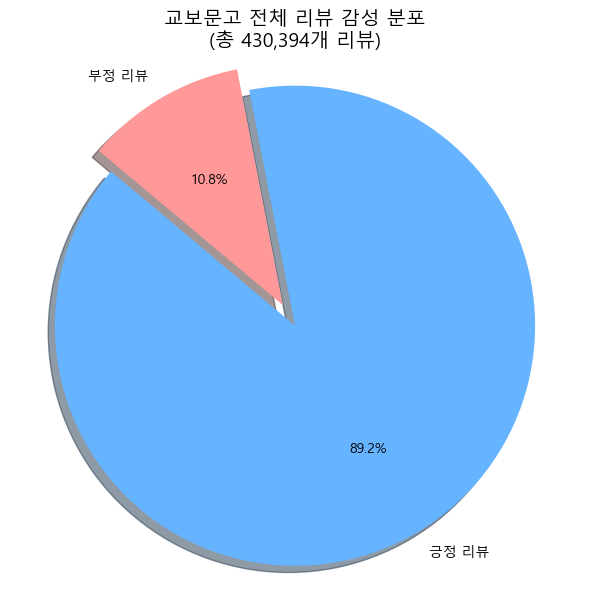

In [3]:
import matplotlib.pyplot as plt

# 데이터
total_reviews = 430394
positive_reviews = 383767
negative_reviews = 46627

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 나머지 (중립 혹은 감성 미분석 리뷰) 계산 (여기선 없음)
labels = ['긍정 리뷰', '부정 리뷰']
sizes = [positive_reviews, negative_reviews]
colors = ['#66b3ff', '#ff9999']  # 파랑: 긍정, 빨강: 부정
explode = (0.05, 0.05)  # 조각 분리 효과

# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=140,
    explode=explode,
    shadow=True
)
plt.title(f'교보문고 전체 리뷰 감성 분포\n(총 {total_reviews:,}개 리뷰)', fontsize=14)
plt.axis('equal')  # 원 모양 유지
plt.tight_layout()
plt.show()


In [53]:
test['rating'].value_counts()

rating
5    379511
4     37473
2      7108
1      5882
0       420
Name: count, dtype: int64

In [68]:
df['rating'].value_counts()

rating
5    355830
4     32664
2      6072
1      5421
0        29
Name: count, dtype: int64

In [70]:
df1['rating'].value_counts()

rating
5    23681
4     4809
2     1036
1      461
0      391
Name: count, dtype: int64

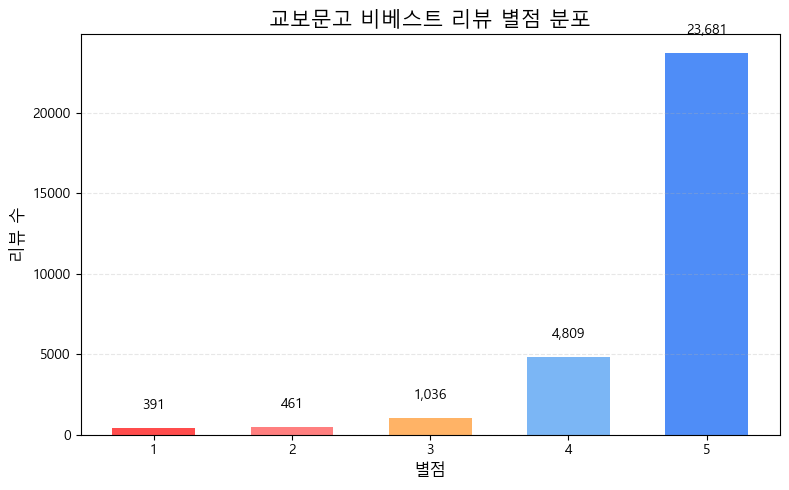

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 데이터
ratings = [5, 4, 3, 2, 1]
counts = [23681, 4809, 1036, 461, 391]

# 색상 설정 (높은 별점은 파랑, 낮은 별점은 빨강)
colors = ['#4f8df7', '#7bb6f5', '#ffb366', '#ff7f7f', '#ff4c4c']

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(ratings, counts, color=colors, width=0.6)

# 라벨 및 타이틀
plt.title('교보문고 비베스트 리뷰 별점 분포', fontsize=15)
plt.xlabel('별점', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.xticks(ratings)  # 별점 그대로 표시
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 값 표시
for i, count in enumerate(counts):
    plt.text(ratings[i], count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
# 교보
df = pd.read_csv('리뷰최종_교보베스트.csv')
df1 = pd.read_csv('리뷰최종_교보비베스트.csv')
test = pd.concat([df,df1])

# 알라딘
df_al = pd.read_csv('리뷰최종_알라딘베스트.csv')
df_al1 = pd.read_csv('리뷰최종_알라딘비베스트.csv')
test1 = pd.concat([df_al, df_al1])

# 예사
df_ys = pd.read_csv('리뷰최종_예사베스트.csv')
df_ys1 = pd.read_csv('리뷰최종_예사비베스트.csv')
test2 = pd.concat([df_ys, df_ys1])

# 영풍
df_yp = pd.read_csv('리뷰최종_영풍베스트.csv')
df_yp1 = pd.read_csv('리뷰최종_영풍비베스트.csv')
test3 = pd.concat([df_yp, df_yp1])

In [ ]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

# 불용어 설정
stopwords = set([
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '를', '으로', '자', '에', '와', '한',
    '하다', '에', '는', '가', '이다', '을', '를', '이', '다', '그', '가', '에', '한', '하다', '것',
    '등', '그리고', '나', '아니', '있다', '없다', '이다', '같다', '때문에', '등', '그', '고', '의', '책', '되다', '도', '수', '에서',
    '적', '않다', '로', '인', '하고', '에게', '내', '때', '더', '일', '못', '만', '서', '알', '읽다', '좋다', '보다', '너무', '되어다', '싶다', '구매', 
    '아니다', '재미있다', '님', '쉬다', '요', '받다', '들다', '대한', '어떻다', '우리', '게', '대해', '알다', '읽히다', '정말', '나오다', '해주다', '그렇다', 
    '가다', '저', '까지', '권', '해보다', '주다', '중', '이라', '오다', '부터', '꼭', '부분', '제', '통해', '하나', '사다', '위해', '안', 
    '한번', '크다', '속', '전', '위', '지금', '이에요', '처럼', '분', '라는', '가지'
])

okt = Okt()
def okt_token(text):
    tokens_ko = okt.morphs(text, stem=True)
    # 불용어 처리
    tokens_ko = [word for word in tokens_ko if word not in stopwords]
    return tokens_ko

word = []
for i in df['review'] :
    word.append(okt_token(i))

# 변수 이름 중복 방지 (sublist는 각 리스트, word_item은 단어)
flattened = [word_item for sublist in word for word_item in sublist]

# 카운팅
counter = Counter(flattened)

# 중복 단어만 DataFrame으로
asd = pd.DataFrame(
    [(w, count) for w, count in counter.items() if count > 1],
    columns=['단어', '등장횟수']
)

# 등장횟수 순 정렬
asd = asd.sort_values(by='등장횟수', ascending=False).reset_index(drop=True)

# 결과 확인
asd

,단어,등장횟수
0,읽다,159944
1,좋다,94608
2,보다,80897
3,생각,51482
4,자다,45294
...,...,...
40594,군법,2
40595,꼬시,2
40596,감람,2
40597,히토미,2


In [9]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

# 불용어 설정
stopwords = set([
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '를', '으로', '자', '에', '와', '한',
    '하다', '에', '는', '가', '이다', '을', '를', '이', '다', '그', '가', '에', '한', '하다', '것',
    '등', '그리고', '나', '아니', '있다', '없다', '이다', '같다', '때문에', '등', '그', '고', '의', '책', '되다', '도', '수', '에서',
    '적', '않다', '로', '인', '하고', '에게', '내', '때', '더', '일', '못', '만', '서', '알', '읽다', '좋다', '보다', '너무', '되어다', '싶다', '구매', 
    '아니다', '재미있다', '님', '쉬다', '요', '받다', '들다', '대한', '어떻다', '우리', '게', '대해', '알다', '읽히다', '정말', '나오다', '해주다', '그렇다', 
    '가다', '저', '까지', '권', '해보다', '주다', '중', '이라', '오다', '부터', '꼭', '부분', '제', '통해', '하나', '사다', '위해', '안', 
    '한번', '크다', '속', '전', '위', '지금', '이에요', '처럼', '분', '라는', '가지'
])

# 형태소 분석 함수
okt = Okt()
def okt_token(text):
    tokens_ko = okt.morphs(text, stem=True)
    tokens_ko = [word for word in tokens_ko if word not in stopwords]
    return tokens_ko

# 분석 대상 데이터와 파일명 매핑
datasets = [
    (df, '교보_베스트'), (df1, '교보_비베스트'),
    (df_al, '알라딘_베스트'), (df_al1, '알라딘_비베스트'),
    (df_ys, '예스24_베스트'), (df_ys1, '예스24_비베스트'),
    (df_yp, '영풍_베스트'), (df_yp1, '영풍_비베스트')
]

# 반복 처리
for data, name in datasets:
    word_list = []

    for review in data['review']:
        if pd.isna(review):
            continue
        word_list.extend(okt_token(review))

    # 단어 빈도 계산
    counter = Counter(word_list)

    # 등장횟수 2번 이상만
    result_df = pd.DataFrame(
        [(w, c) for w, c in counter.items() if c > 1],
        columns=['단어', '등장횟수']
    )

    # 정렬 및 저장
    result_df = result_df.sort_values(by='등장횟수', ascending=False).reset_index(drop=True)
    result_df.to_csv(f'{name}_단어빈도.csv', index=False, encoding='utf-8-sig')

    print(f"✅ 저장 완료: {name}_단어빈도.csv")

✅ 저장 완료: 교보_베스트_단어빈도.csv
✅ 저장 완료: 교보_비베스트_단어빈도.csv
✅ 저장 완료: 알라딘_베스트_단어빈도.csv
✅ 저장 완료: 알라딘_비베스트_단어빈도.csv
✅ 저장 완료: 예스24_베스트_단어빈도.csv
✅ 저장 완료: 예스24_비베스트_단어빈도.csv
✅ 저장 완료: 영풍_베스트_단어빈도.csv
✅ 저장 완료: 영풍_비베스트_단어빈도.csv


In [59]:
df = pd.read_csv('영풍_베스트_단어빈도.csv')
df1 = pd.read_csv('영풍_비베스트_단어빈도.csv')

In [60]:
df_ky = pd.concat([df, df1])

In [61]:
df_ky['단어'].duplicated().sum()

np.int64(2661)

In [62]:
df_ky = df_ky.groupby('단어', as_index=False)['등장횟수'].sum()
df_ky = df_ky.sort_values(by='등장횟수', ascending=False).reset_index(drop=True)

In [63]:
df_ky

,단어,등장횟수
0,생각,1694
1,사람,1186
2,투자,1143
3,보기,1124
4,펼치다,1018
...,...,...
8742,자칭,2
8743,자처,2
8744,자존심,2
8745,자자하다,2


In [64]:
df_ky.to_csv('영풍_통합_단어빈도.csv', index=False)

# 베스트 / 비베스트 / 전체 키워드 빈도 분석

In [1]:
import pandas as pd 
df_ky = pd.read_csv('교보_베스트_단어빈도.csv')
df_ky1 = pd.read_csv('교보_비베스트_단어빈도.csv')
df_ky2 = pd.read_csv('교보_통합_단어빈도.csv')

df_al = pd.read_csv('알라딘_베스트_단어빈도.csv')
df_al1 = pd.read_csv('알라딘_비베스트_단어빈도.csv')
df_al2 = pd.read_csv('알라딘_통합_단어빈도.csv')

df_ys = pd.read_csv('예스24_베스트_단어빈도.csv')
df_ys1 = pd.read_csv('예스24_비베스트_단어빈도.csv')
df_ys2 = pd.read_csv('예스24_통합_단어빈도.csv')

df_yp = pd.read_csv('영풍_베스트_단어빈도.csv')
df_yp1 = pd.read_csv('영풍_비베스트_단어빈도.csv')
df_yp2 = pd.read_csv('영풍_통합_단어빈도.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_14268\213624836.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='등장횟수', y='단어', data=top_words, palette='viridis')


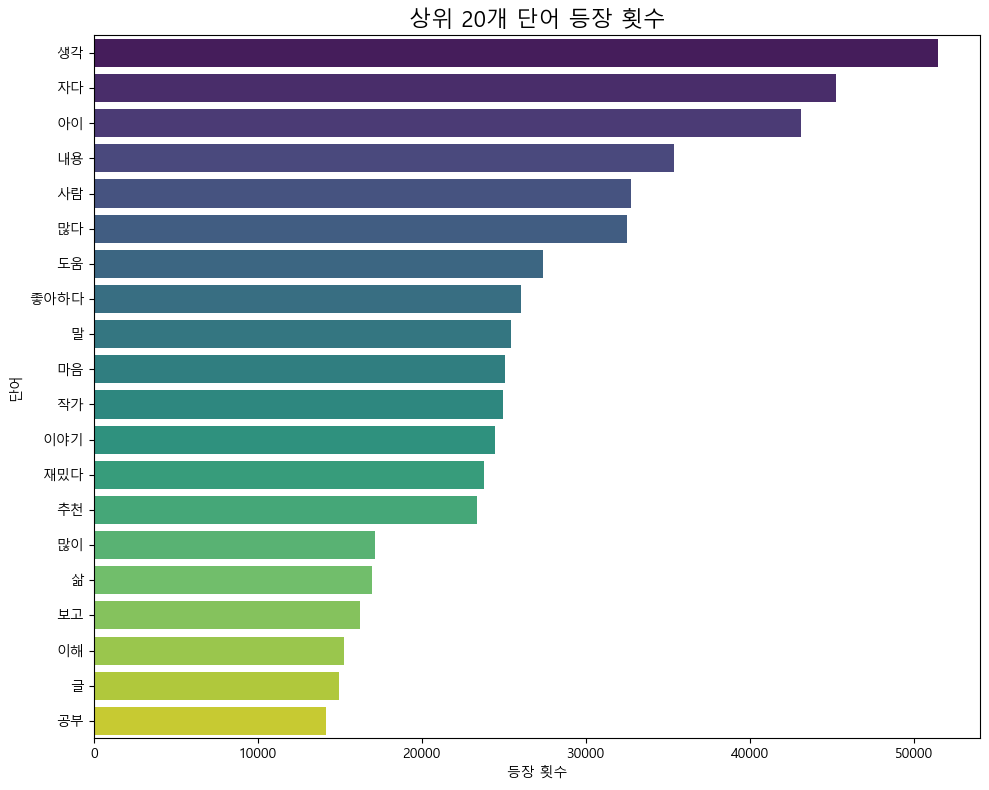

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 깨짐 방지 (한글 지원)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우인 경우
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
top_words = df_ky.head(20)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='등장횟수', y='단어', data=top_words, palette='viridis')

plt.title('상위 20개 단어 등장 횟수', fontsize=16)
plt.xlabel('등장 횟수')
plt.ylabel('단어')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14268\918277712.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\918277712.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\918277712.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


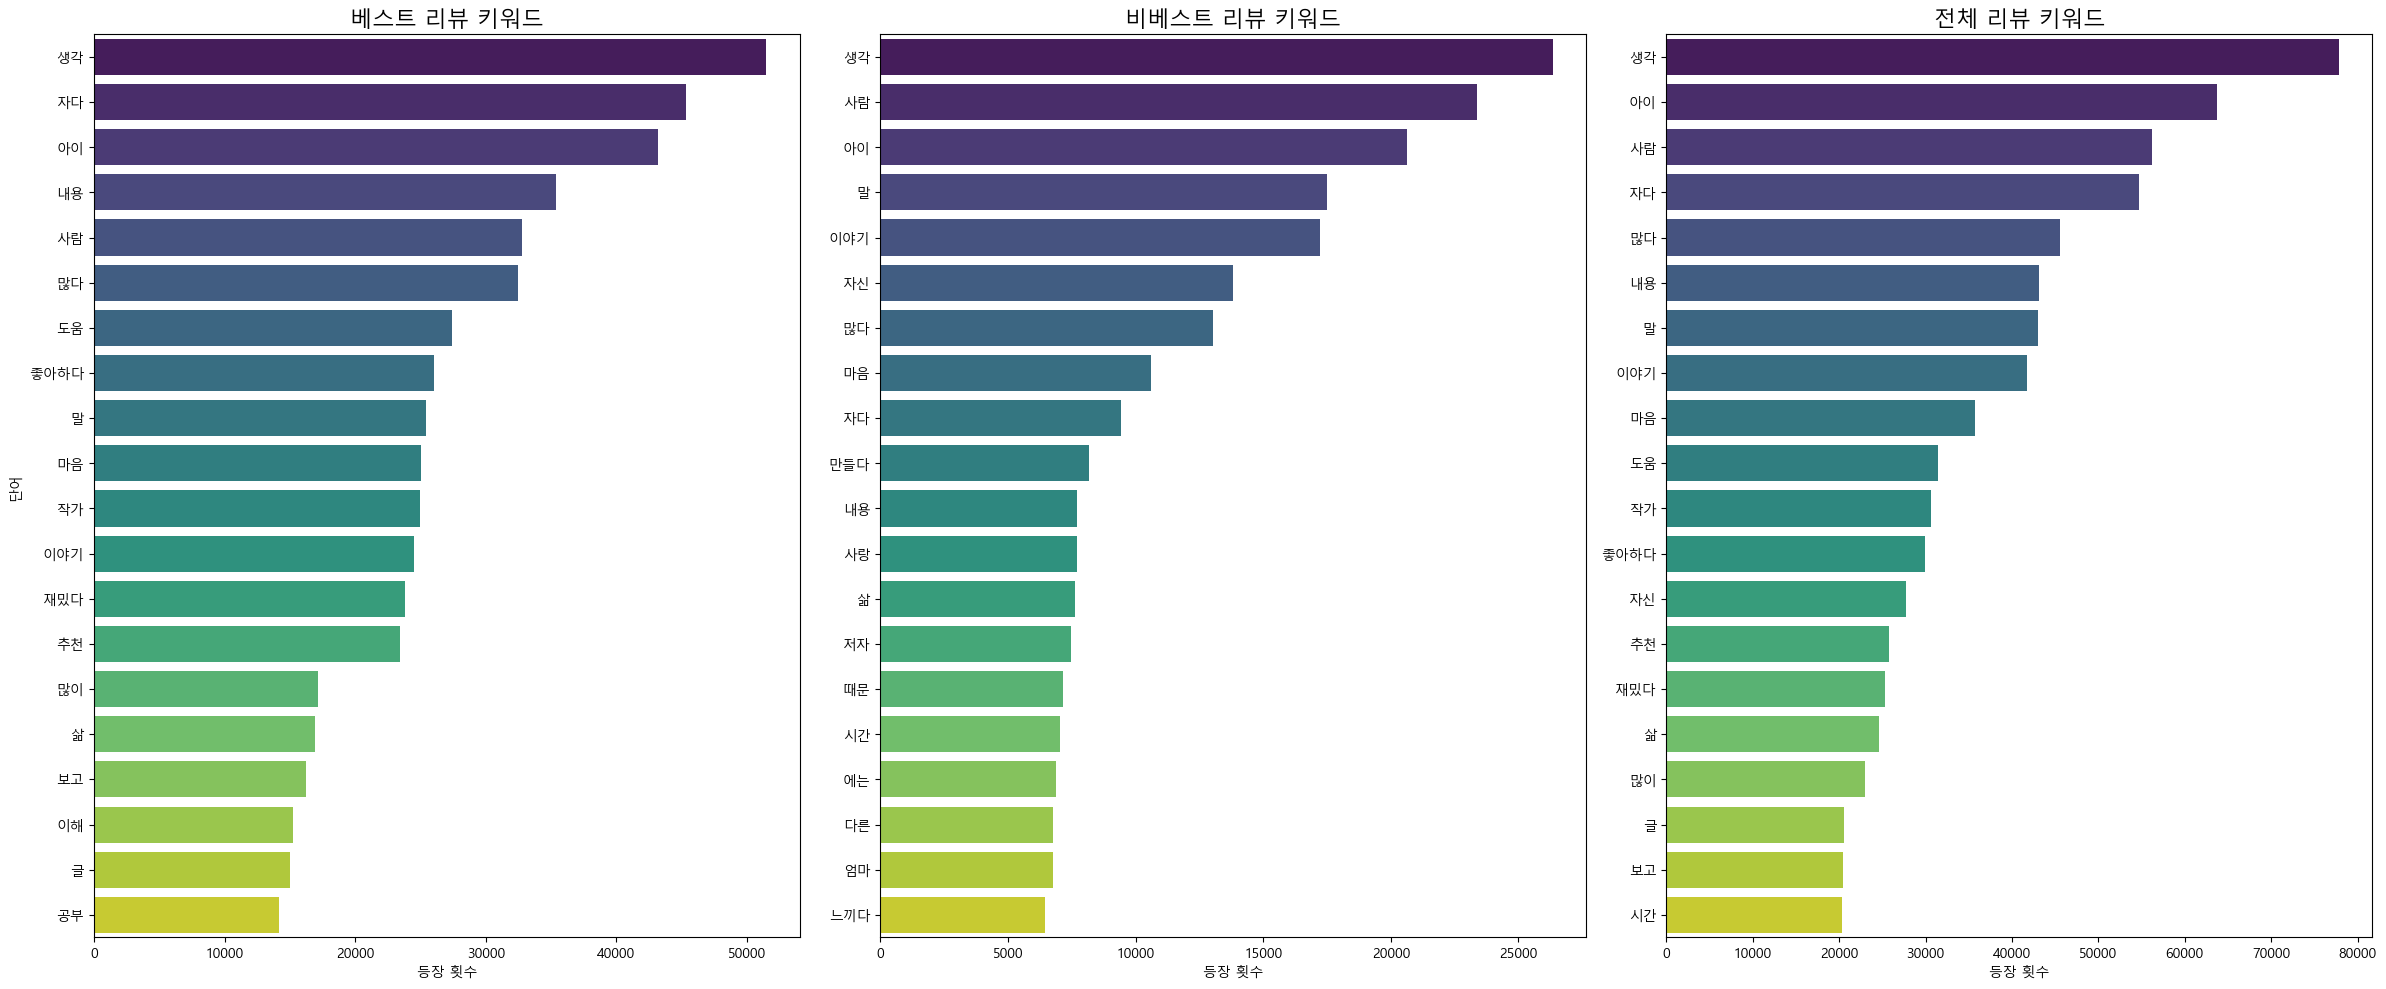

In [ ]:
# 교보
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
top_words_list = [df_ky.head(20), df_ky1.head(20), df_ky2.head(20)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']  # 예시 제목

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(24, 10))  # 가로로 3분할

for i, ax in enumerate(axes):
    sns.barplot(
        x='등장횟수', y='단어',
        data=top_words_list[i],
        palette='viridis',
        ax=ax
    )
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('등장 횟수')
    ax.set_ylabel('단어' if i == 0 else '')  # 첫 번째만 y축 라벨 표시

plt.tight_layout()
plt.show()


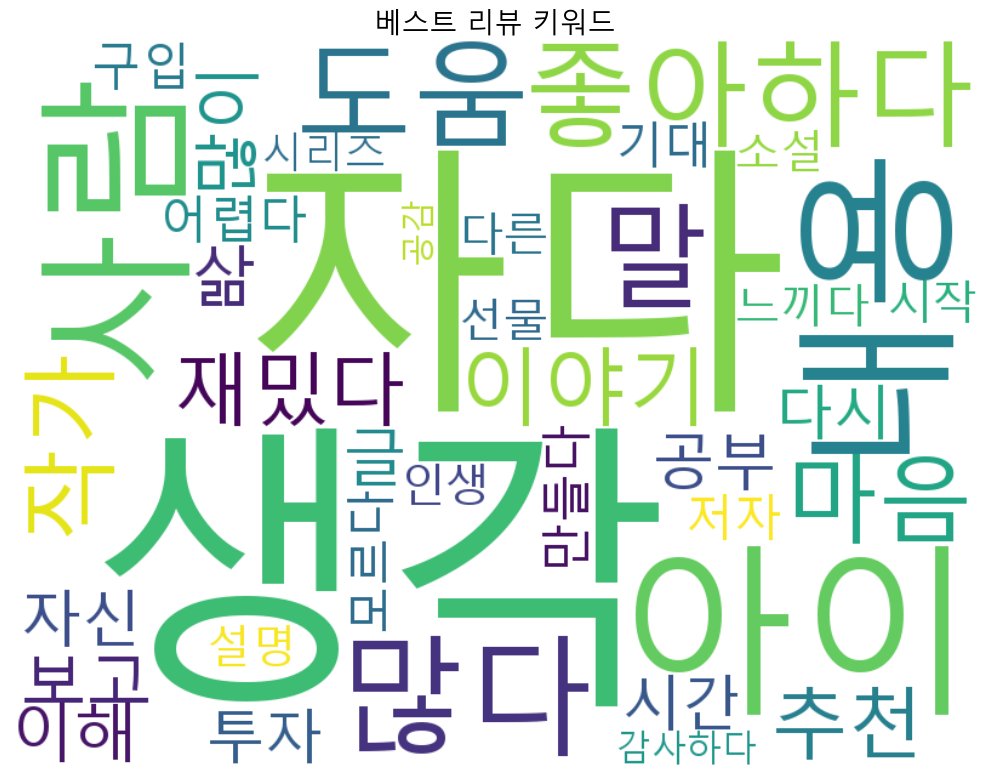

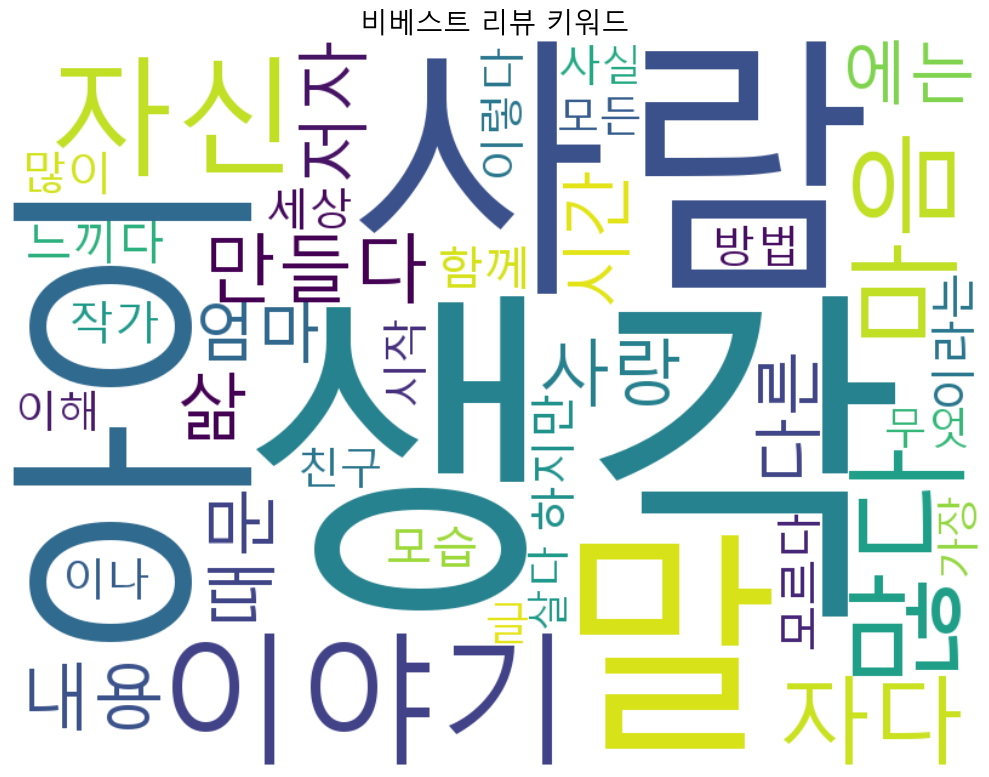

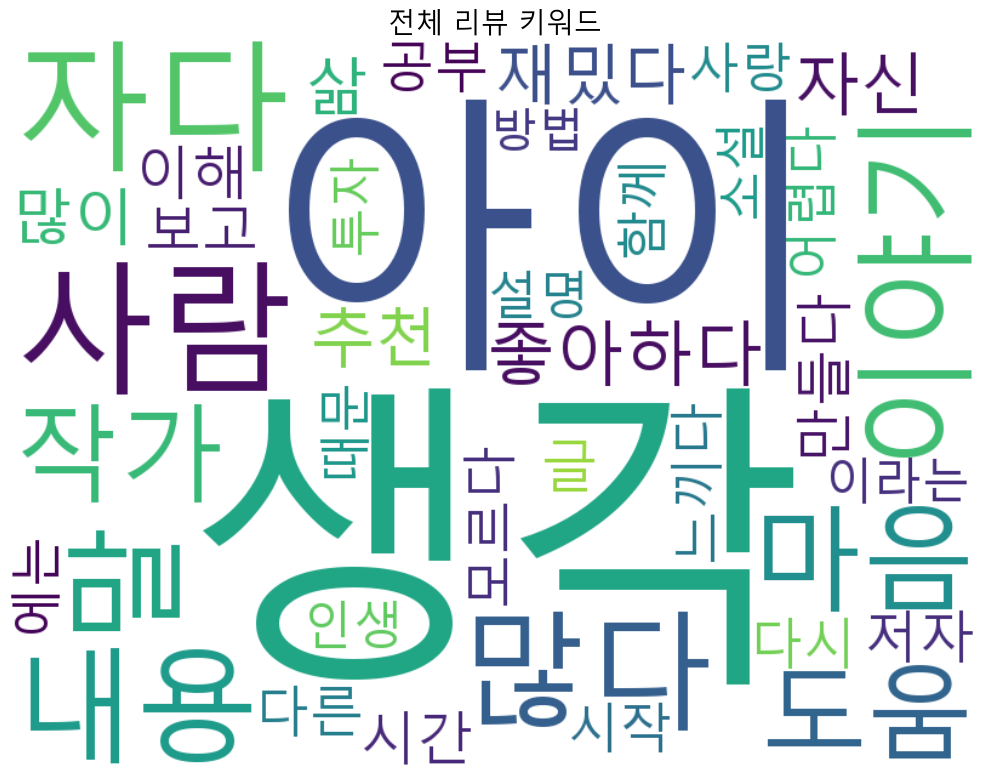

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 데이터와 제목 리스트
top_words_list = [df_ky.head(40), df_ky1.head(40), df_ky2.head(40)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']

# 각각 개별 워드클라우드 페이지로 출력
for i in range(3):
    word_freq = dict(zip(top_words_list[i]['단어'], top_words_list[i]['등장횟수']))
    
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        colormap='viridis'
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(titles[i], fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()



In [18]:
df_al1[df_al1['단어'].str.contains('Th')]

,단어,등장횟수
14,Thanks,16668
2899,The,350
9904,Theme,55
20745,Thomas,13
21922,Theory,12
22792,Thief,11
23005,This,11
23701,Think,10
31173,They,5
31382,Thing,5


In [19]:
df_al1.drop(14, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14268\932676544.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\932676544.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\932676544.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


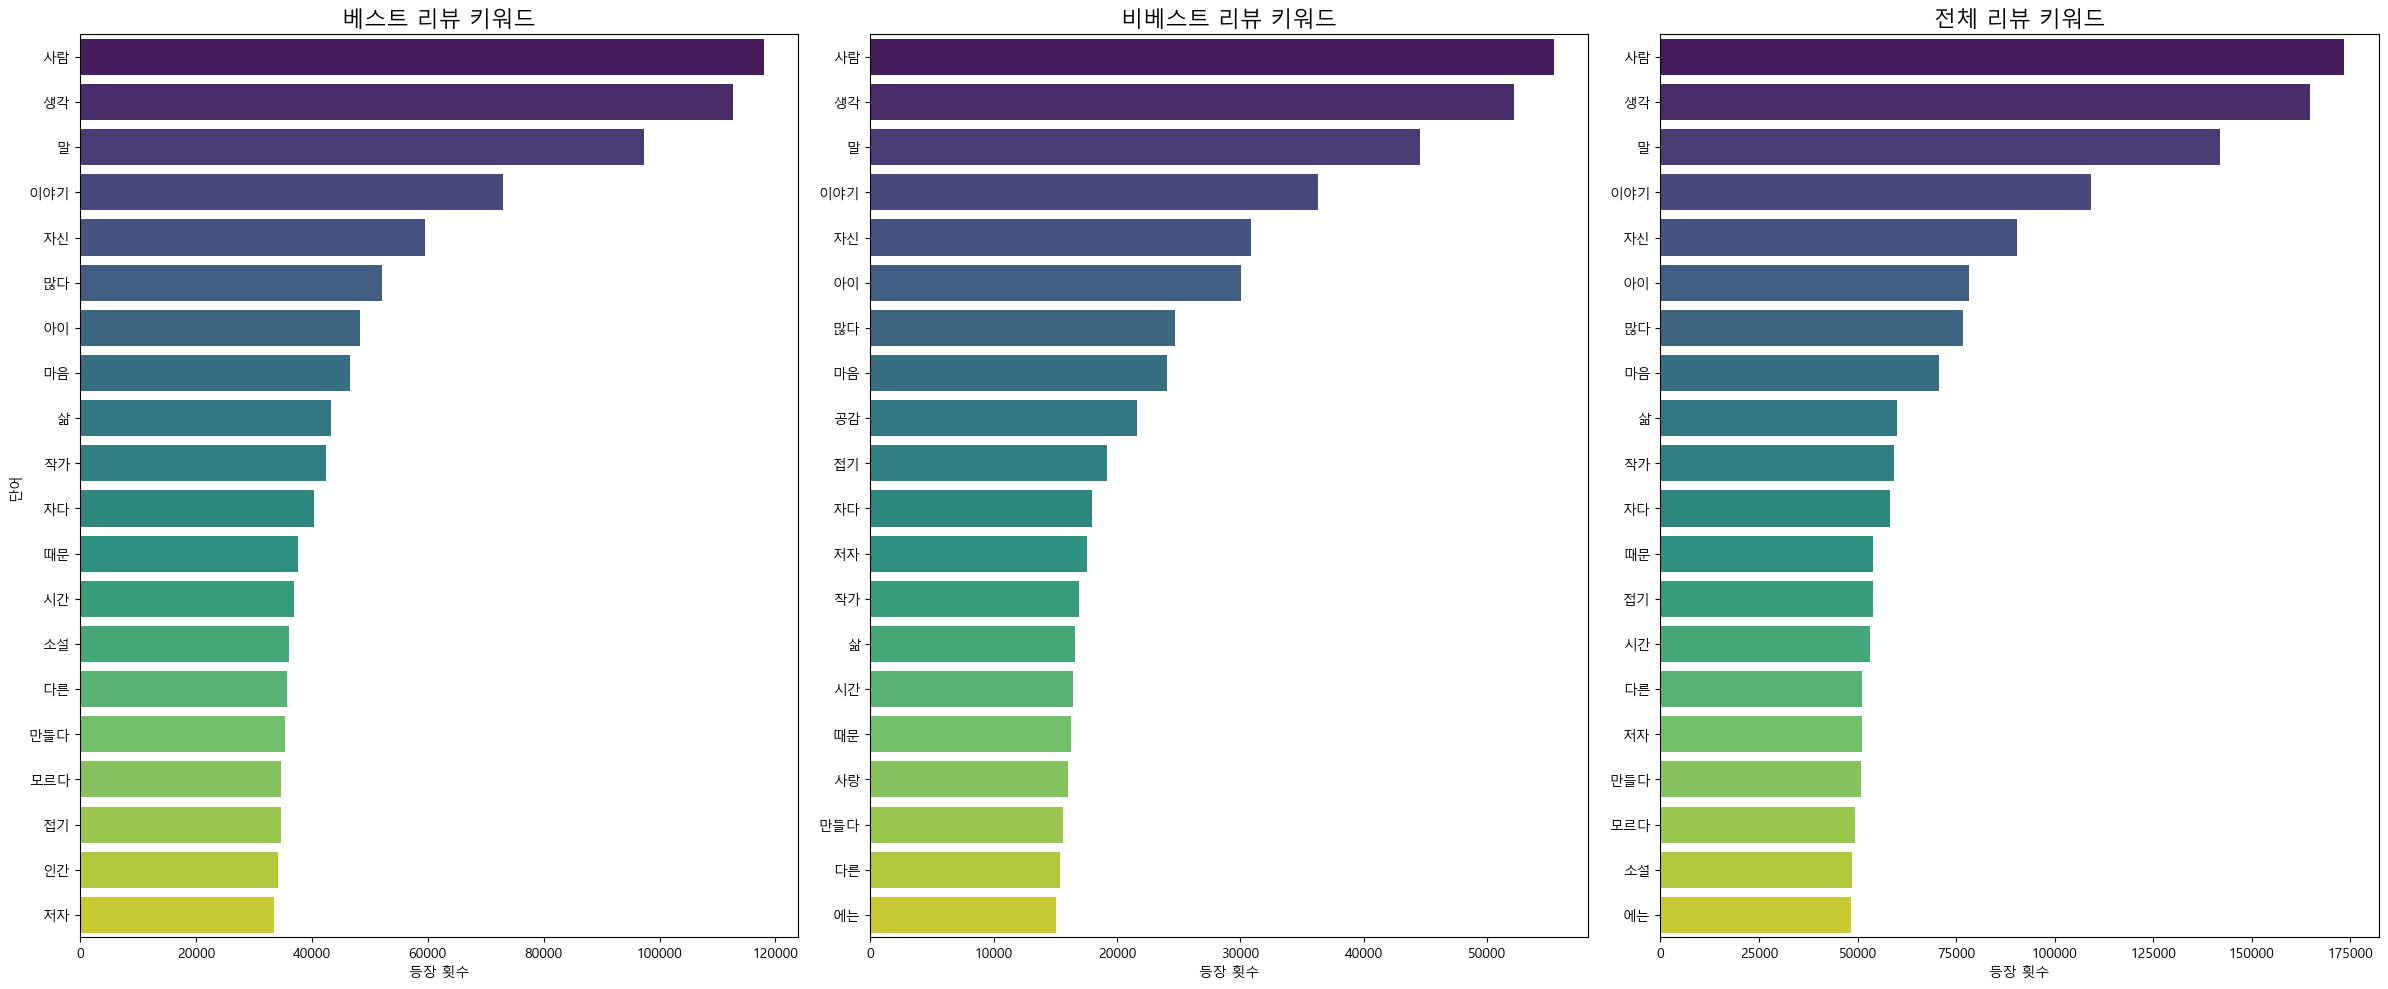

In [20]:
# 알라딘
# 데이터 준비
top_words_list = [df_al.head(20), df_al1.head(20), df_al2.head(20)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']  # 예시 제목

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(24, 10))  # 가로로 3분할

for i, ax in enumerate(axes):
    sns.barplot(
        x='등장횟수', y='단어',
        data=top_words_list[i],
        palette='viridis',
        ax=ax
    )
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('등장 횟수')
    ax.set_ylabel('단어' if i == 0 else '')  # 첫 번째만 y축 라벨 표시

plt.tight_layout()
plt.show()

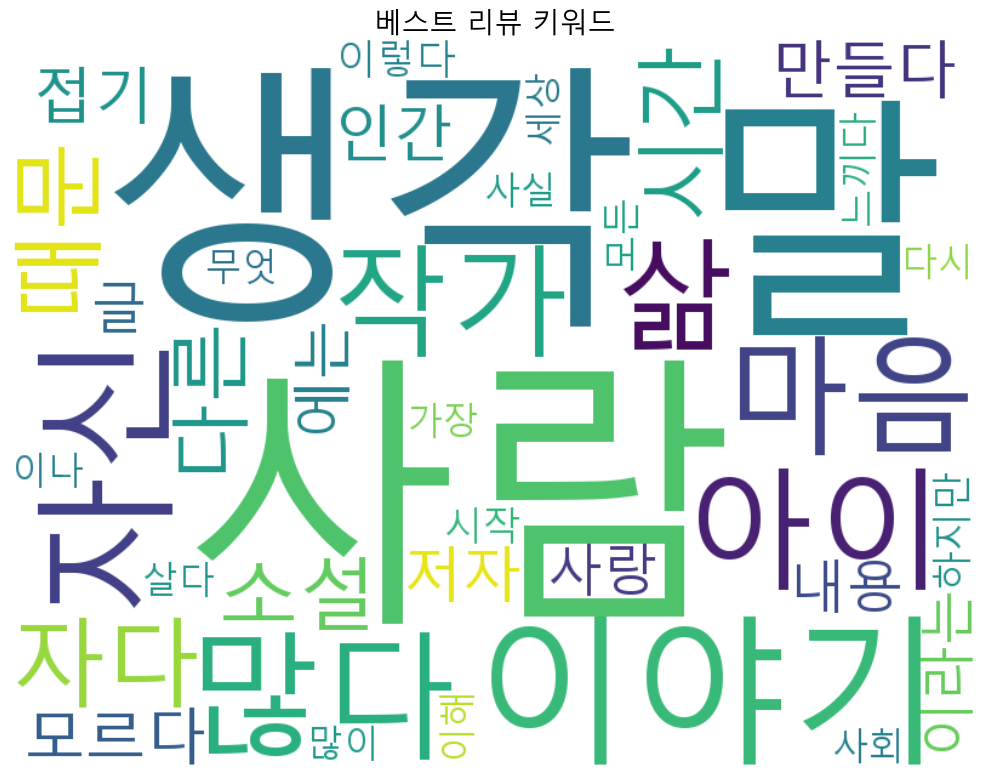

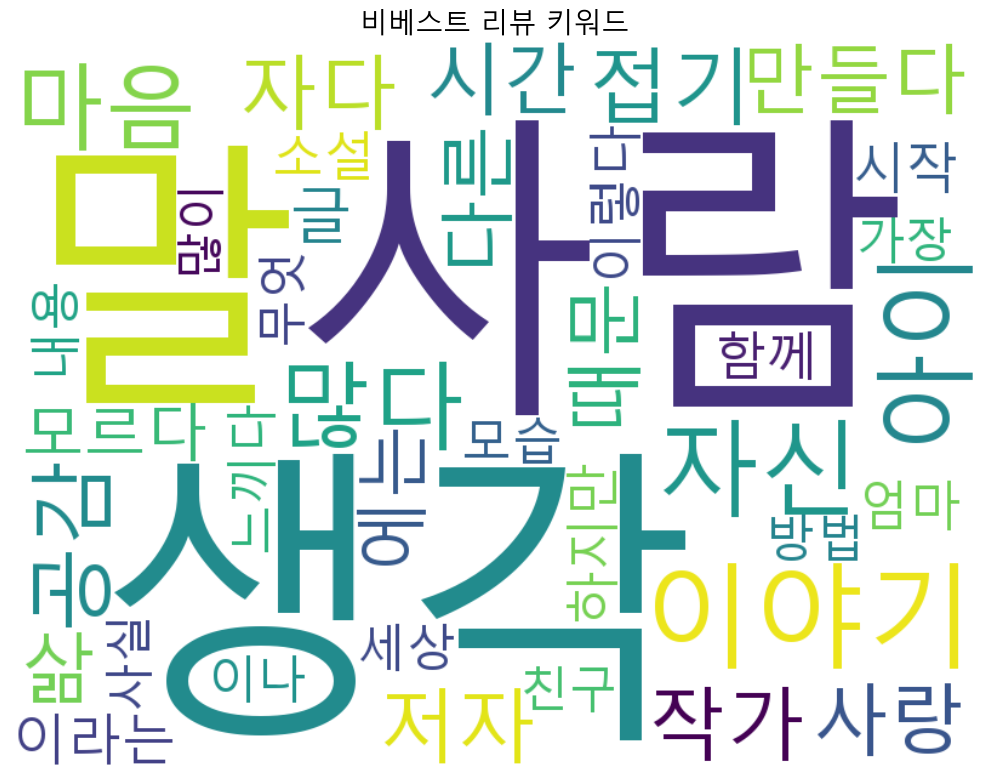

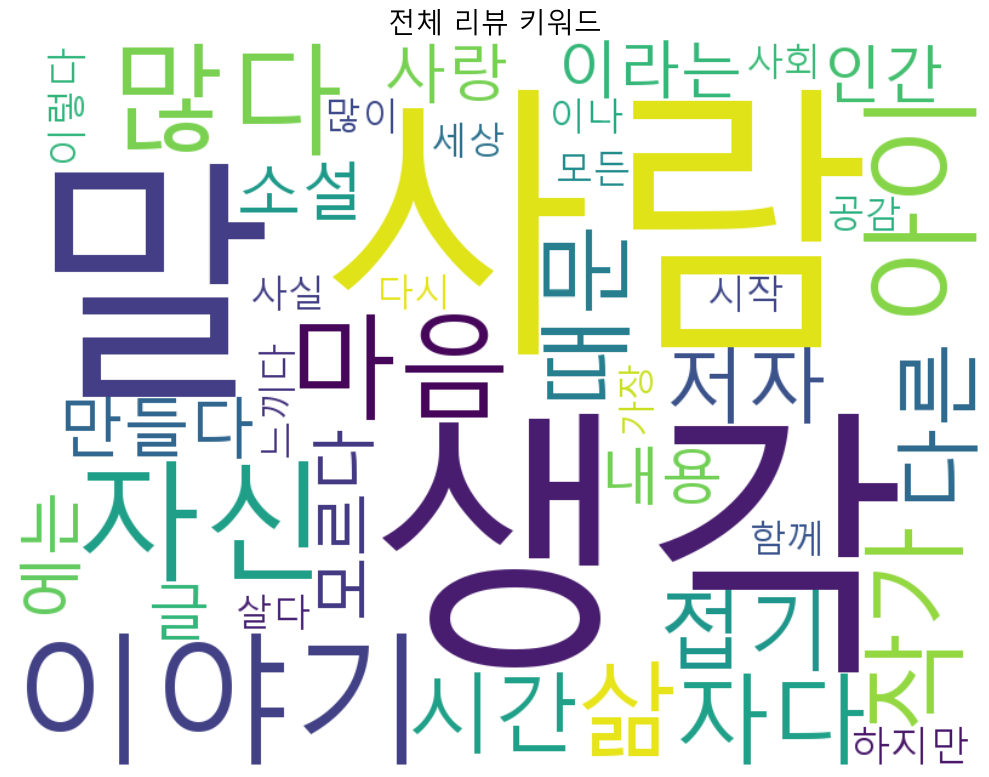

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 데이터와 제목 리스트
top_words_list = [df_al.head(40), df_al1.head(40), df_al2.head(40)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']

# 각각 개별 워드클라우드 페이지로 출력
for i in range(3):
    word_freq = dict(zip(top_words_list[i]['단어'], top_words_list[i]['등장횟수']))
    
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        colormap='viridis'
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(titles[i], fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14268\3630834090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\3630834090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\3630834090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


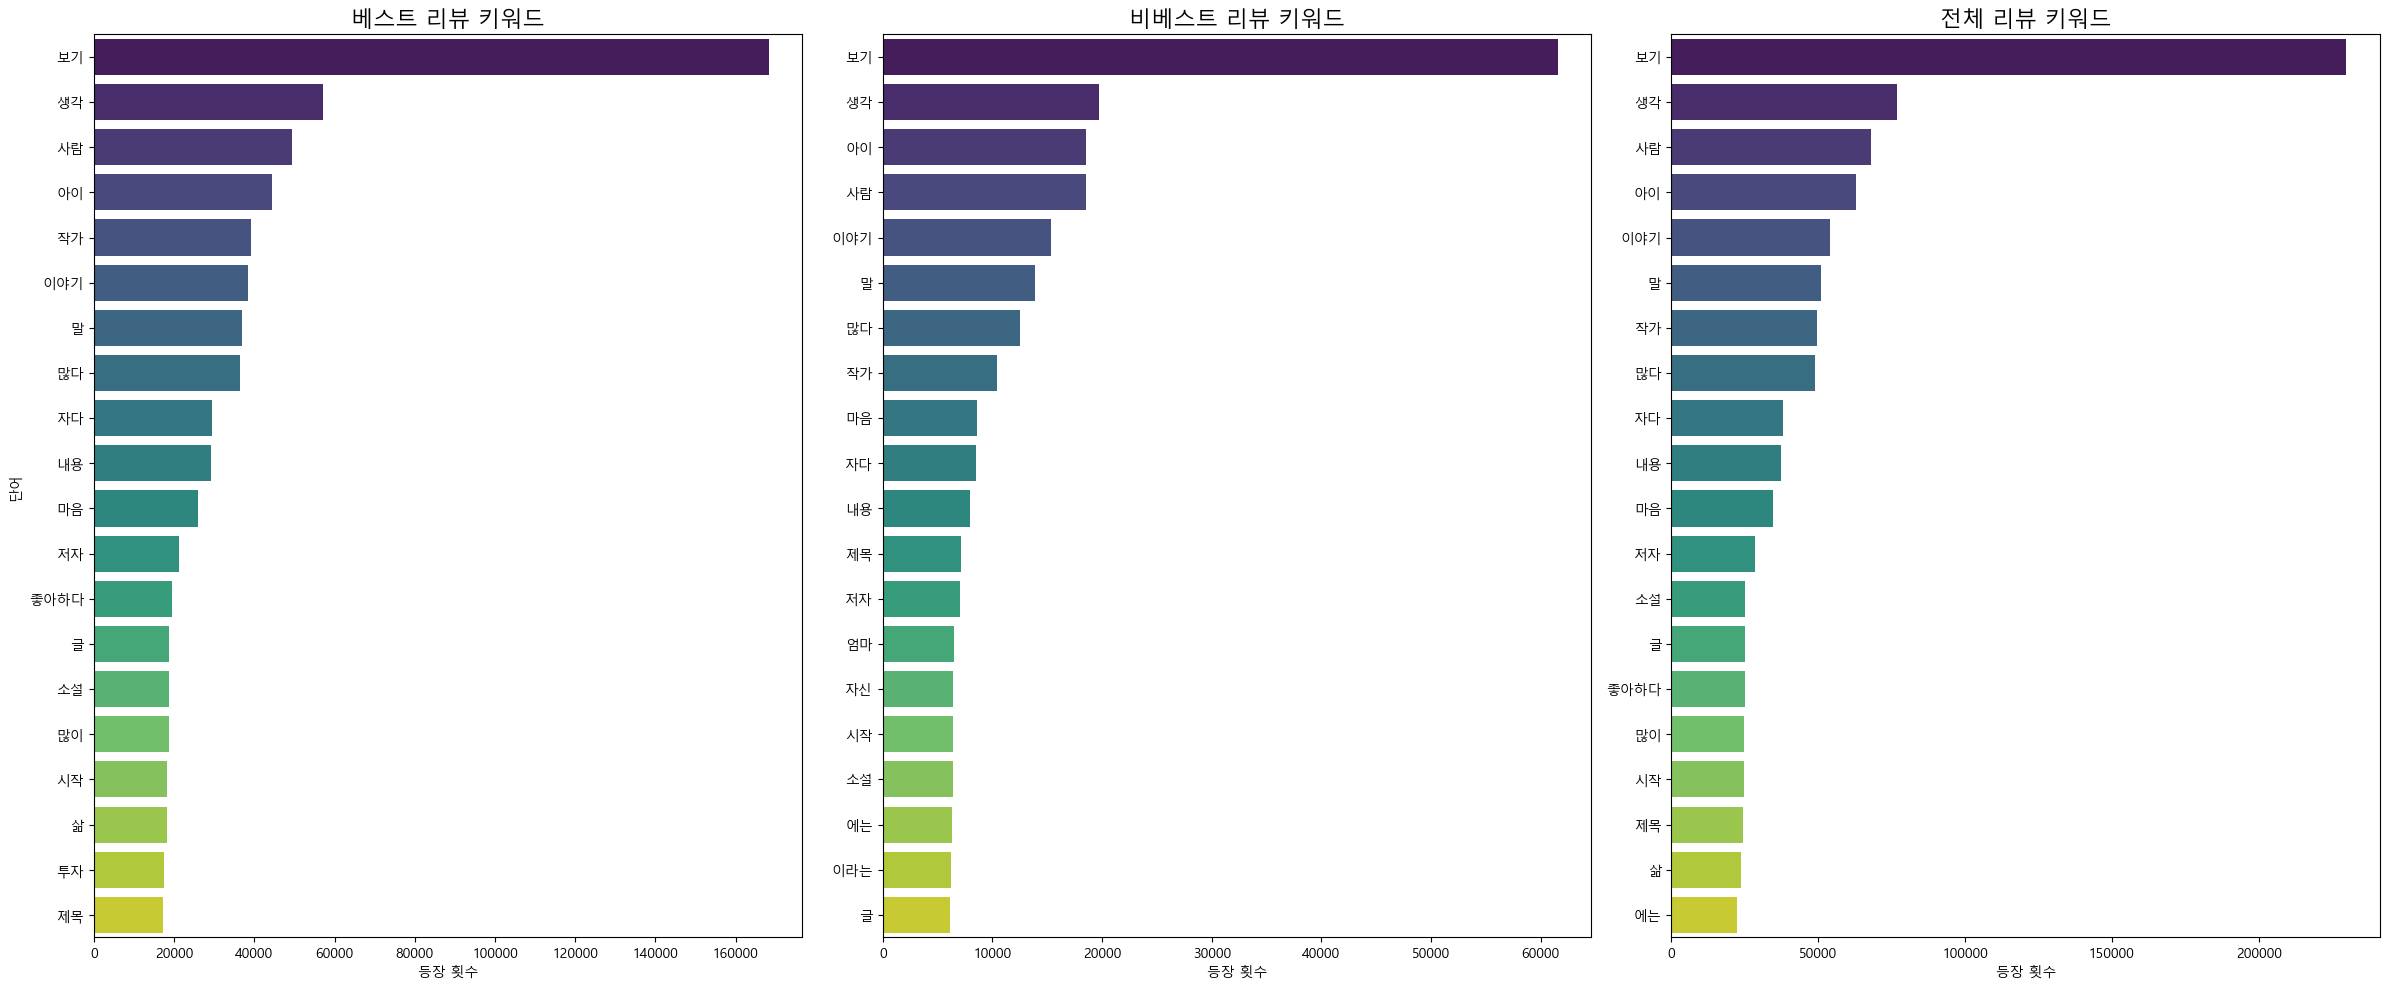

In [9]:
# 예사
# 데이터 준비
top_words_list = [df_ys.head(20), df_ys1.head(20), df_ys2.head(20)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']  # 예시 제목

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(24, 10))  # 가로로 3분할

for i, ax in enumerate(axes):
    sns.barplot(
        x='등장횟수', y='단어',
        data=top_words_list[i],
        palette='viridis',
        ax=ax
    )
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('등장 횟수')
    ax.set_ylabel('단어' if i == 0 else '')  # 첫 번째만 y축 라벨 표시

plt.tight_layout()
plt.show()

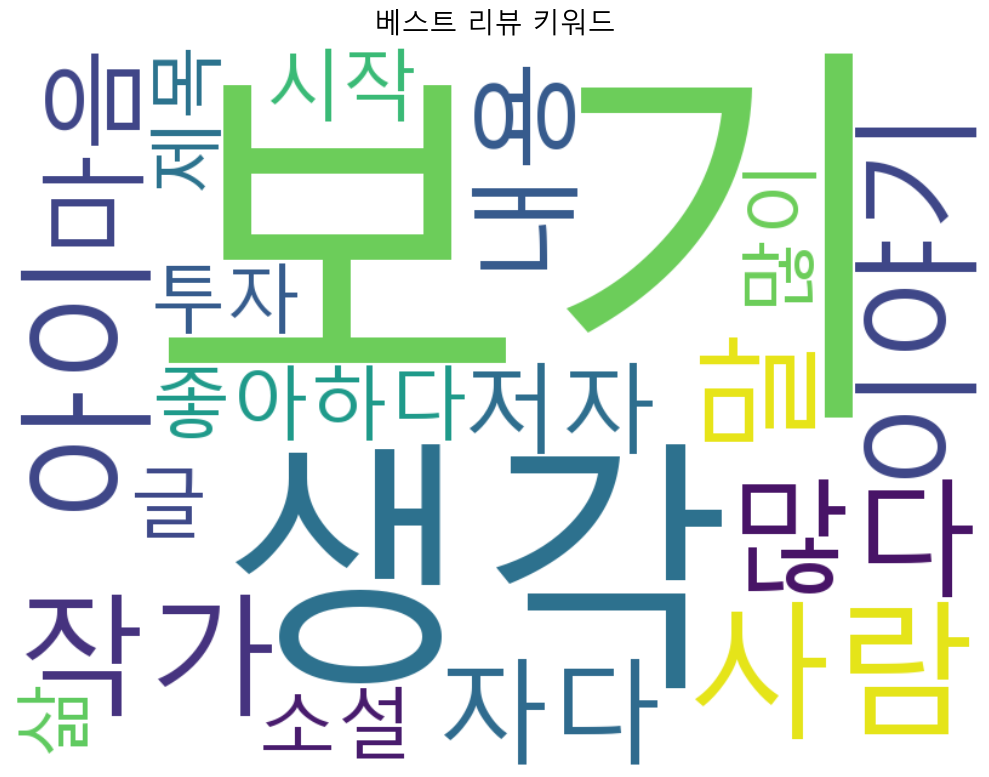

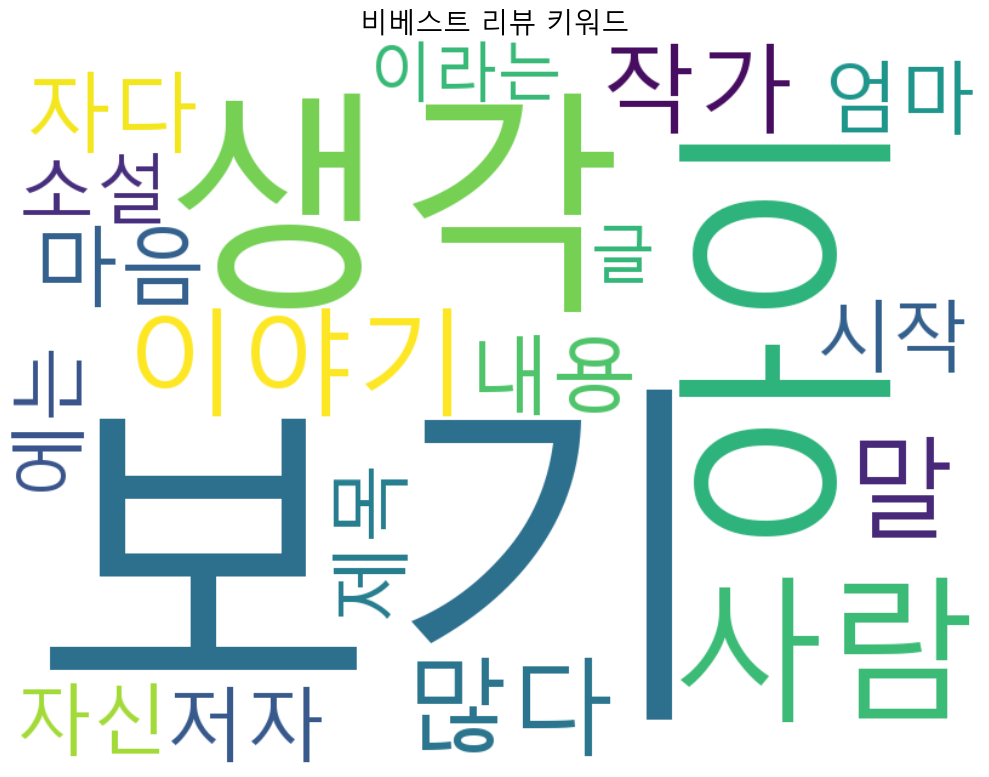

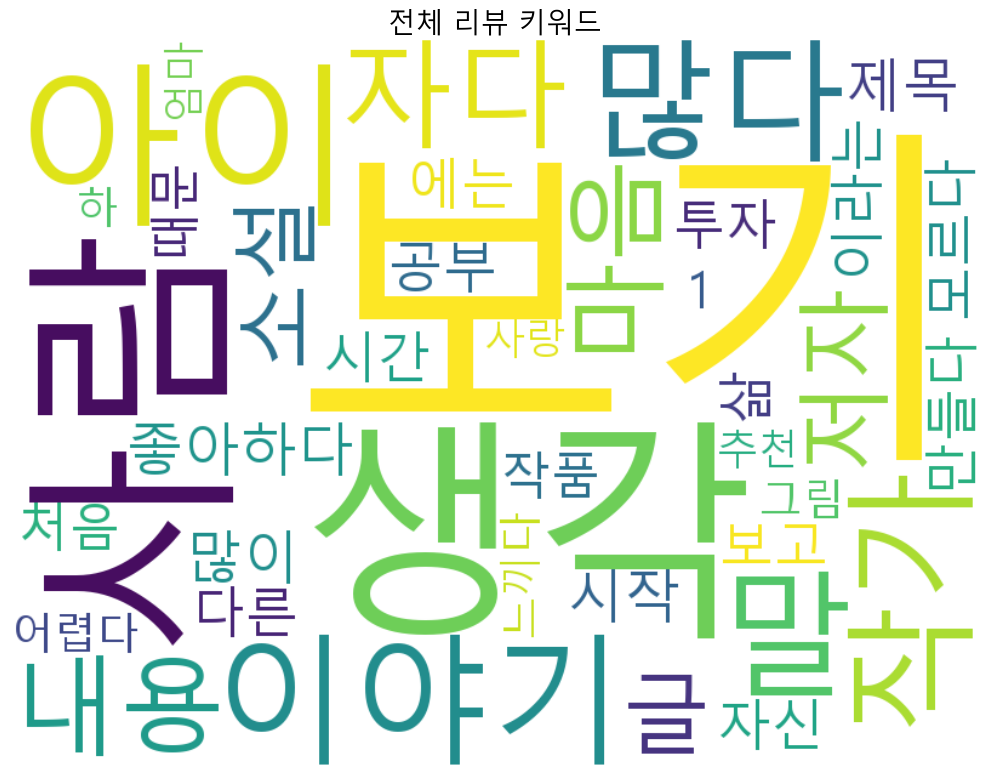

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 데이터와 제목 리스트
top_words_list = [df_ys.head(20), df_ys1.head(20), df_ys2.head(40)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']

# 각각 개별 워드클라우드 페이지로 출력
for i in range(3):
    word_freq = dict(zip(top_words_list[i]['단어'], top_words_list[i]['등장횟수']))
    
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        colormap='viridis'
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(titles[i], fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14268\4112195651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\4112195651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_14268\4112195651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


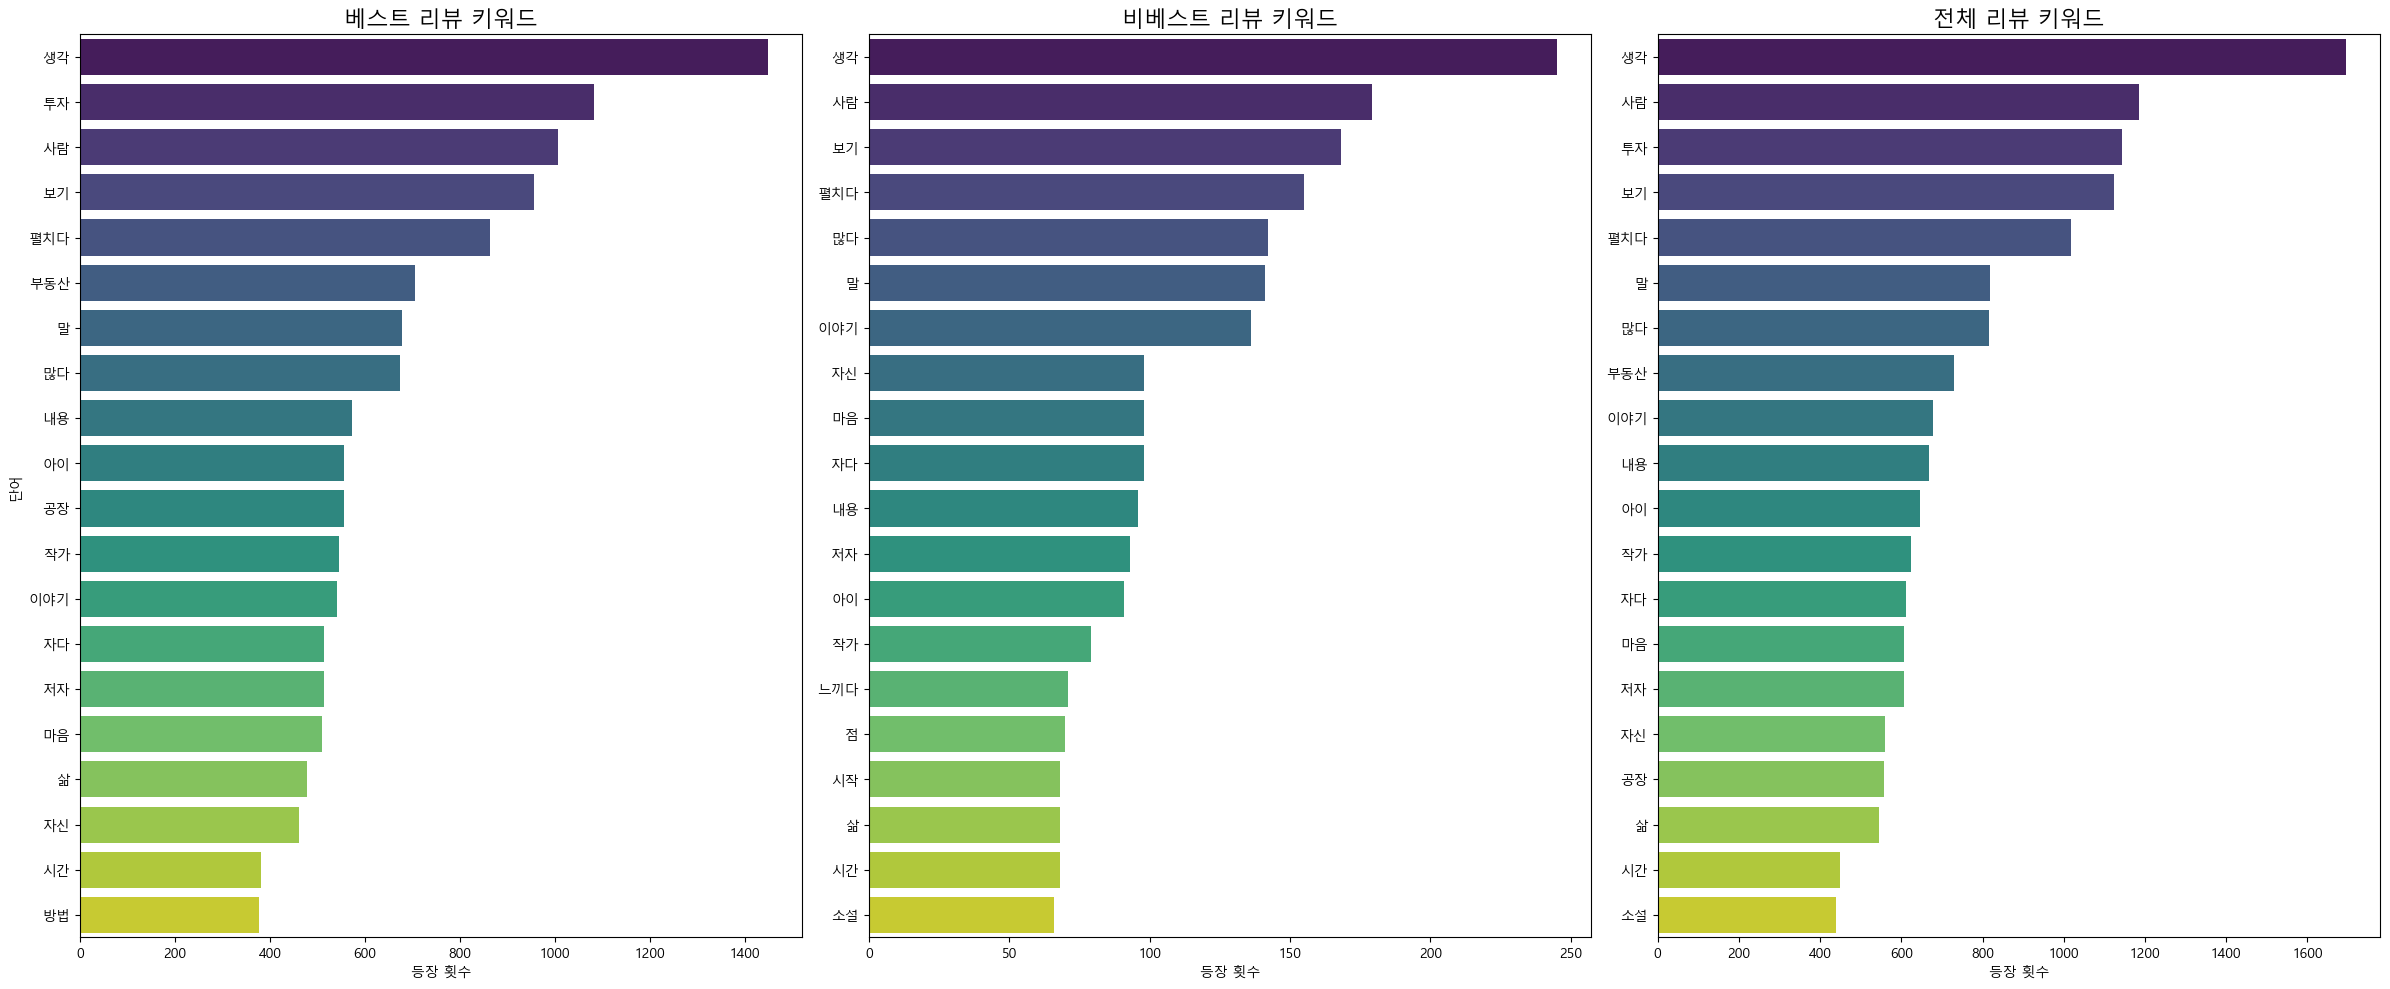

In [10]:
# 영풍
# 데이터 준비
top_words_list = [df_yp.head(20), df_yp1.head(20), df_yp2.head(20)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']  # 예시 제목

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(24, 10))  # 가로로 3분할

for i, ax in enumerate(axes):
    sns.barplot(
        x='등장횟수', y='단어',
        data=top_words_list[i],
        palette='viridis',
        ax=ax
    )
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('등장 횟수')
    ax.set_ylabel('단어' if i == 0 else '')  # 첫 번째만 y축 라벨 표시

plt.tight_layout()
plt.show()

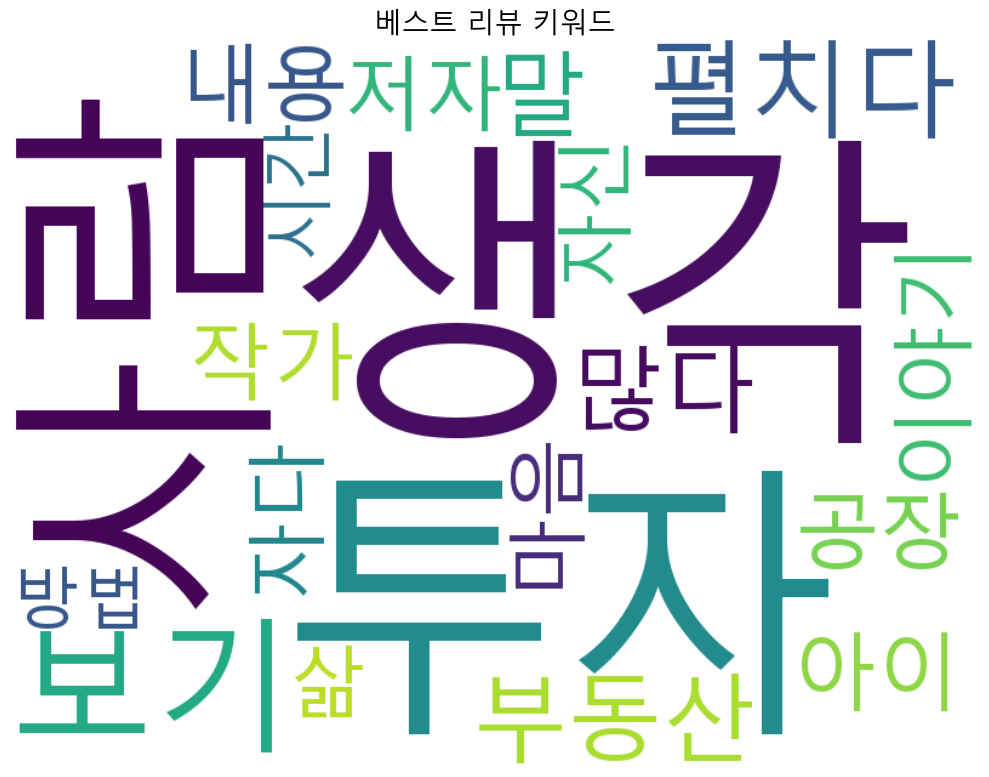

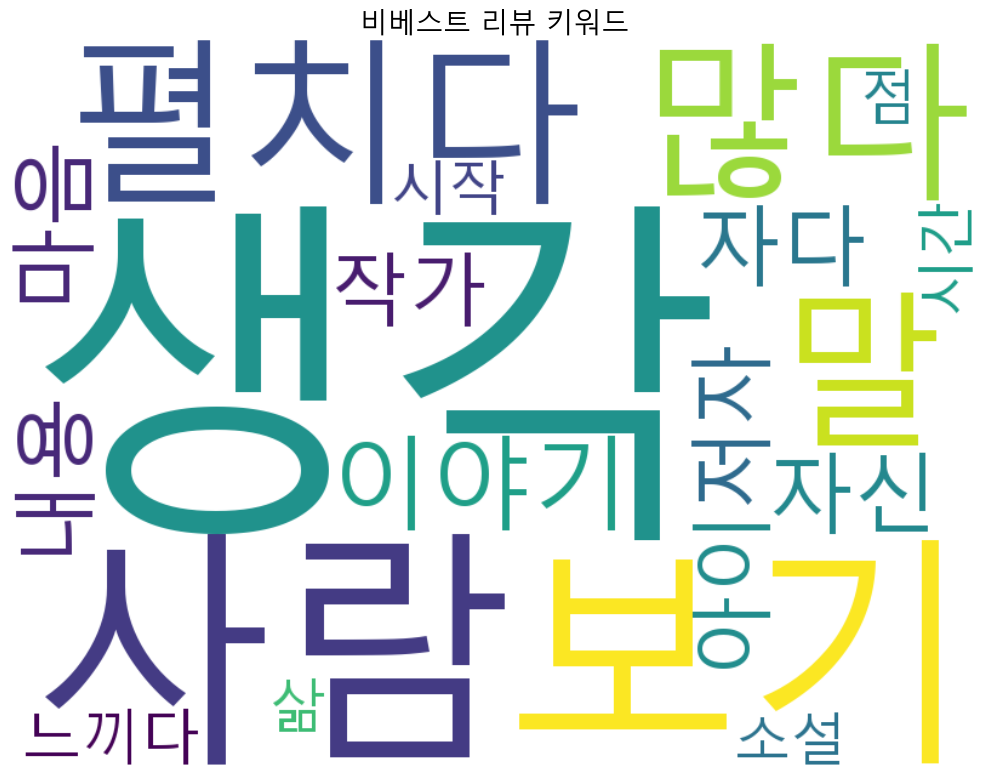

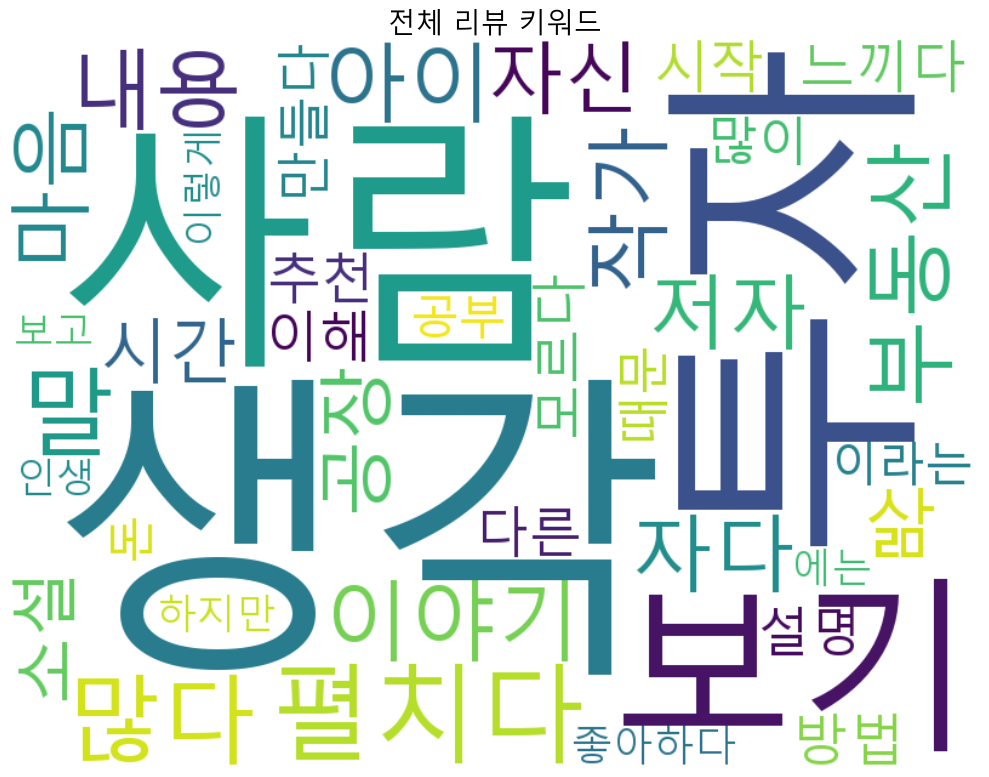

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 데이터와 제목 리스트
top_words_list = [df_yp.head(20), df_yp1.head(20), df_yp2.head(40)]
titles = ['베스트 리뷰 키워드', '비베스트 리뷰 키워드', '전체 리뷰 키워드']

# 각각 개별 워드클라우드 페이지로 출력
for i in range(3):
    word_freq = dict(zip(top_words_list[i]['단어'], top_words_list[i]['등장횟수']))
    
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        colormap='viridis'
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(titles[i], fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

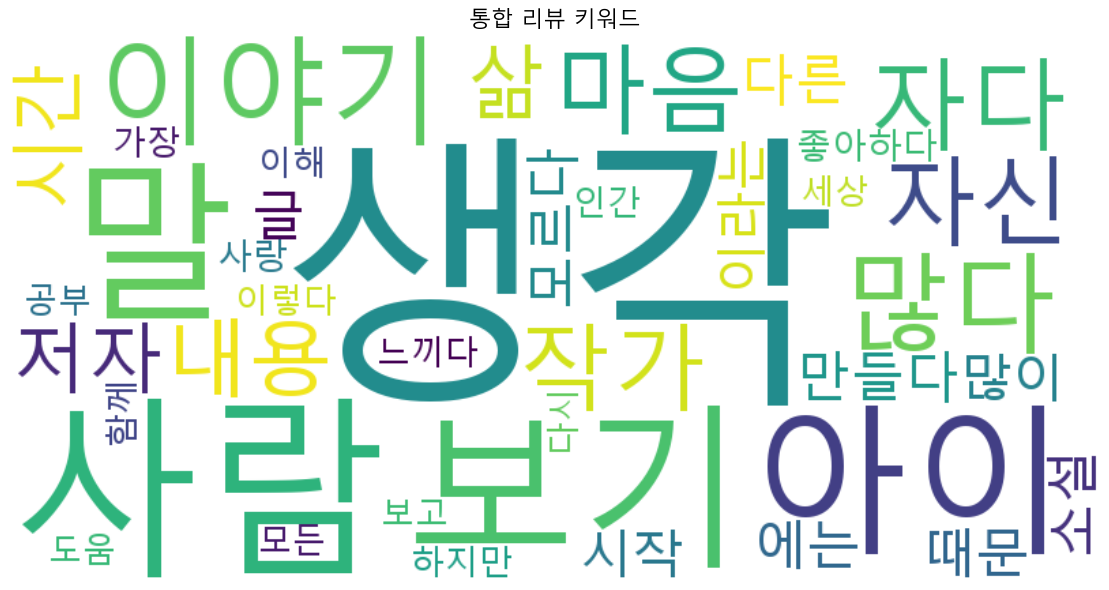

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# ✅ 1. 데이터프레임 합치기
combined_df = pd.concat([df_ky2, df_al2, df_ys2, df_yp2], ignore_index=True)

# ✅ 2. 단어별 등장횟수 합산
word_counts = combined_df.groupby('단어')['등장횟수'].sum()

# ✅ 3. 상위 20개 단어 추출
top_20 = word_counts.sort_values(ascending=False).head(40)

# ✅ 4. 워드클라우드 생성
wordcloud = WordCloud(
    font_path='malgun.ttf',       # Windows용 한글 폰트 (필요 시 경로 변경)
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(top_20.to_dict())

# ✅ 5. 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('통합 리뷰 키워드', fontsize=16)
plt.tight_layout()
plt.show()



# 기존 시각자료 너무 길어서 필요한 부분만 떼서 시각화

In [5]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전12.csv')
df1 = pd.read_csv('비베스트셀러_최종버전11.csv')

In [6]:
# 베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform = df.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df = ranked_df.sort_values('CLASS_NO')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 등장 수 기준으로 CLASS_NO 정렬
class_counts = df['CLASS_NO'].value_counts()
genre_score_sorted = genre_score_by_platform.loc[class_counts.index.intersection(genre_score_by_platform.index)]
genre_score_sorted = genre_score_sorted.reindex(class_counts.index)

# 전체 데이터를 한 페이지로 시각화
plt.figure(figsize=(12, max(4, len(genre_score_sorted) * 0.4)))  # 크기 자동 조절
sns.heatmap(genre_score_sorted, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, cbar=True)

plt.title('CLASS_NO별 플랫폼 평균 점수 비교')
plt.xlabel('플랫폼')
plt.ylabel('CLASS_NO')
plt.tight_layout()
plt.show()


In [8]:
ranked_df

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,kyobo,4.11,aladin,3.37,yes24,3.18,yp,0.34
1,"강연집, 수필집, 연설문집",yes24,4.30,kyobo,4.26,aladin,3.00,yp,1.40
2,"건축, 건축학",kyobo,7.46,yes24,4.20,aladin,3.63,yp,1.41
3,경제학,kyobo,5.92,yes24,3.51,aladin,3.23,yp,0.45
4,경학,kyobo,5.33,aladin,3.05,yes24,2.42,yp,0.24
...,...,...,...,...,...,...,...,...,...
70,행정학,kyobo,4.07,aladin,3.45,yes24,2.03,yp,0.00
71,형이상학,kyobo,5.03,aladin,2.99,yes24,1.82,yp,0.00
72,화학,kyobo,3.74,aladin,2.68,yes24,2.46,yp,0.00
73,화학공학,kyobo,3.41,aladin,3.38,yes24,2.95,yp,0.38


In [69]:
ranked_df[ranked_df['1위'] != 'kyobo'].sort_values(by='1위점수')

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
39,언어,aladin,3.05,kyobo,2.72,yes24,2.18,yp,0.00
5,"공연예술, 매체예술",aladin,3.10,kyobo,2.99,yes24,1.62,yp,0.14
51,"일반 학회, 단체, 협회, 기관, 연구기관",aladin,3.50,yes24,3.26,kyobo,0.00,yp,0.00
27,사진예술,yes24,4.11,kyobo,3.80,aladin,3.20,yp,0.00
1,"강연집, 수필집, 연설문집",yes24,4.30,kyobo,4.26,aladin,3.00,yp,1.40
35,식물학,aladin,4.39,kyobo,3.92,yes24,2.53,yp,0.00
57,종교,yes24,5.12,kyobo,4.23,aladin,2.99,yp,0.97
64,철학의 체계,yes24,5.19,kyobo,4.72,aladin,3.47,yp,0.00


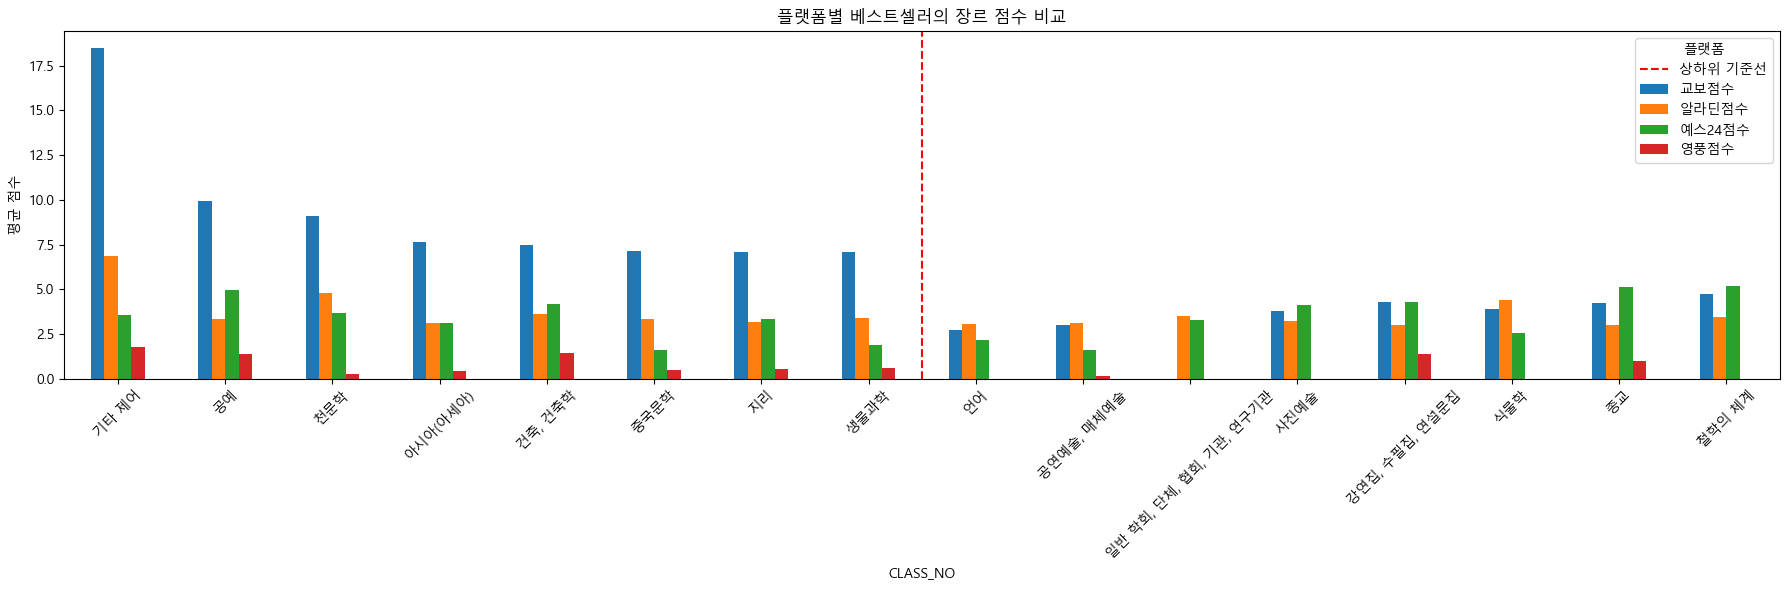

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 1. kyobo가 아닌 플랫폼이 1위인 CLASS_NO 8개 추출
not_kyobo_df = ranked_df[ranked_df['1위'] != 'kyobo'].copy()
bottom8_class = not_kyobo_df.sort_values(by='1위점수').head(8)['CLASS_NO']

# ✅ 2. kyobo가 1위인 CLASS_NO 중 상위 점수 8개 추출
kyobo_df = ranked_df[ranked_df['1위'] == 'kyobo'].copy()
top8_class = kyobo_df.sort_values(by='1위점수', ascending=False).head(8)['CLASS_NO']

# ✅ 3. 두 그룹 합치기 (순서 유지)
selected_classes = pd.concat([top8_class, bottom8_class], ignore_index=True)

# ✅ 4. genre_score_by_platform에서 해당 CLASS_NO만 추출
selected_scores = genre_score_by_platform.loc[selected_classes]

# ✅ 5. 순서 유지
selected_scores = selected_scores.reindex(selected_classes)

# ✅ 6. 열 이름 변경
platform_rename = {
    'kyobo_score': '교보점수',
    'aladin_score': '알라딘점수',
    'yes24_score': '예스24점수',
    'yp_score': '영풍점수'
}
selected_scores.rename(columns=platform_rename, inplace=True)

# ✅ 7. 시각화
plt.figure(figsize=(18, 6))
selected_scores.plot(kind='bar', ax=plt.gca())

plt.title("플랫폼별 베스트셀러의 장르 점수 비교")
plt.ylabel("평균 점수")
plt.xlabel("CLASS_NO")
plt.xticks(rotation=45)

# ✅ 8. 상하위 경계선 (상위 8개 기준)
plt.axvline(x=7.5, color='red', linestyle='--', label='상하위 기준선')

plt.legend(title="플랫폼")
plt.tight_layout()
plt.show()



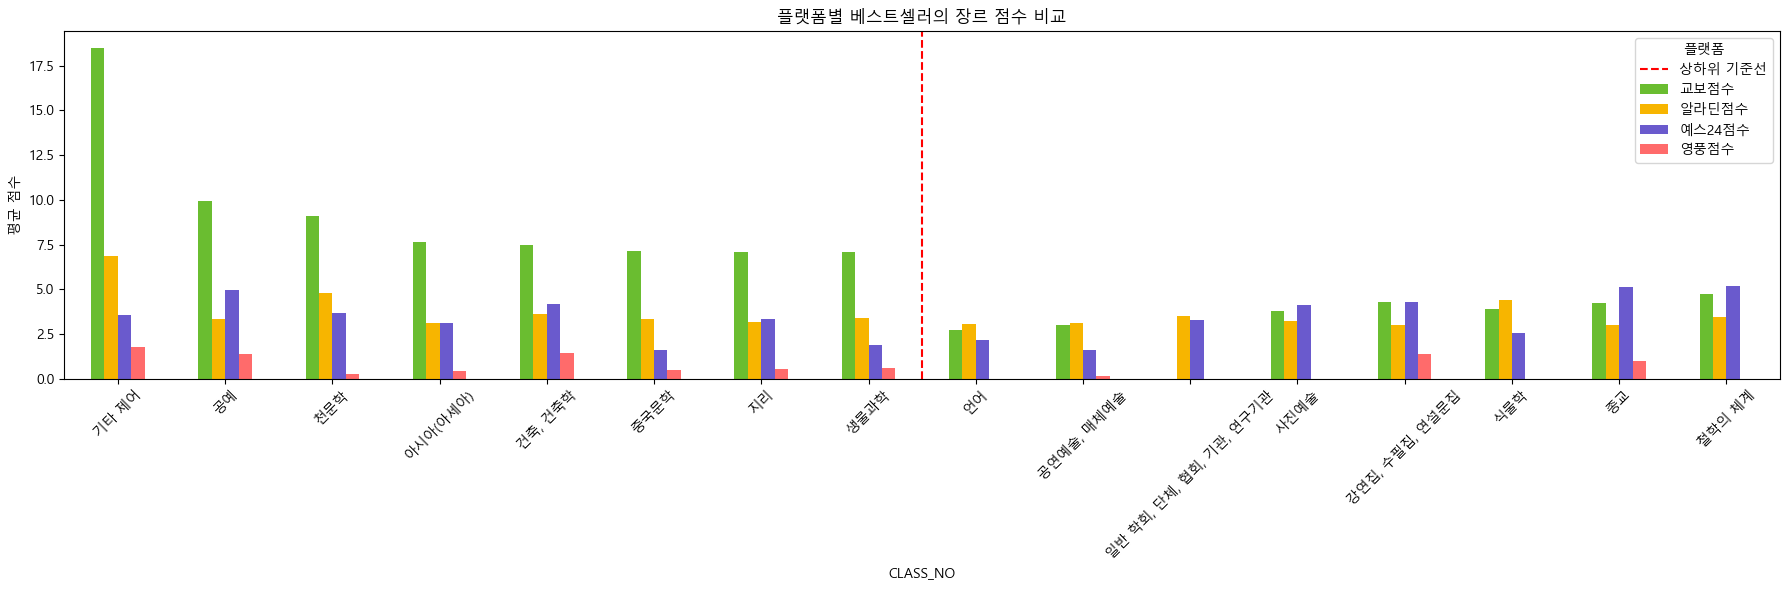

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 1. kyobo가 아닌 플랫폼이 1위인 CLASS_NO 8개 추출
not_kyobo_df = ranked_df[ranked_df['1위'] != 'kyobo'].copy()
bottom8_class = not_kyobo_df.sort_values(by='1위점수').head(8)['CLASS_NO']

# ✅ 2. kyobo가 1위인 CLASS_NO 중 상위 점수 8개 추출
kyobo_df = ranked_df[ranked_df['1위'] == 'kyobo'].copy()
top8_class = kyobo_df.sort_values(by='1위점수', ascending=False).head(8)['CLASS_NO']

# ✅ 3. 두 그룹 합치기 (순서 유지)
selected_classes = pd.concat([top8_class, bottom8_class], ignore_index=True)

# ✅ 4. genre_score_by_platform에서 해당 CLASS_NO만 추출
selected_scores = genre_score_by_platform.loc[selected_classes]

# ✅ 5. 순서 유지
selected_scores = selected_scores.reindex(selected_classes)

# ✅ 6. 열 이름 변경
platform_rename = {
    'kyobo_score': '교보점수',
    'aladin_score': '알라딘점수',
    'yes24_score': '예스24점수',
    'yp_score': '영풍점수'
}
selected_scores.rename(columns=platform_rename, inplace=True)

# ✅ 7. 시각화

colors = ['#6ABD30', '#F7B500', '#6A5ACD', '#FF6B6B']  
# 순서: 교보점수, 알라딘점수, 예스24점수, 영풍점수
# platform_rename 컬럼 순서가 ['교보점수', '알라딘점수', '예스24점수', '영풍점수']라
# colors 리스트도 이 순서에 맞게 맞춤

plt.figure(figsize=(18, 6))
selected_scores.plot(kind='bar', ax=plt.gca(), color=colors)

plt.title("플랫폼별 베스트셀러의 장르 점수 비교")
plt.ylabel("평균 점수")
plt.xlabel("CLASS_NO")
plt.xticks(rotation=45)

# ✅ 8. 상하위 경계선 (상위 8개 기준)
plt.axvline(x=7.5, color='red', linestyle='--', label='상하위 기준선')

plt.legend(title="플랫폼")
plt.tight_layout()
plt.show()


In [18]:
# 비베스트
# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform1 = df1.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform1.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_df1 = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_df1 = ranked_df1.sort_values('CLASS_NO')

# 6. 출력
ranked_df1

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,yes24,2.14,kyobo,1.88,aladin,1.56,yp,0.04
1,"강연집, 수필집, 연설문집",kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
2,"건축, 건축학",yes24,1.50,kyobo,1.41,yp,0.76,aladin,0.75
3,경제학,yes24,1.60,kyobo,1.50,aladin,1.34,yp,0.07
4,경학,kyobo,1.61,aladin,0.99,yes24,0.79,yp,0.35
...,...,...,...,...,...,...,...,...,...
70,행정학,kyobo,0.00,aladin,0.00,yes24,0.00,yp,0.00
71,형이상학,aladin,1.40,kyobo,1.18,yes24,0.00,yp,0.00
72,화학,kyobo,2.70,yes24,1.40,aladin,1.14,yp,0.00
73,화학공학,aladin,1.34,yes24,1.26,kyobo,1.21,yp,0.00


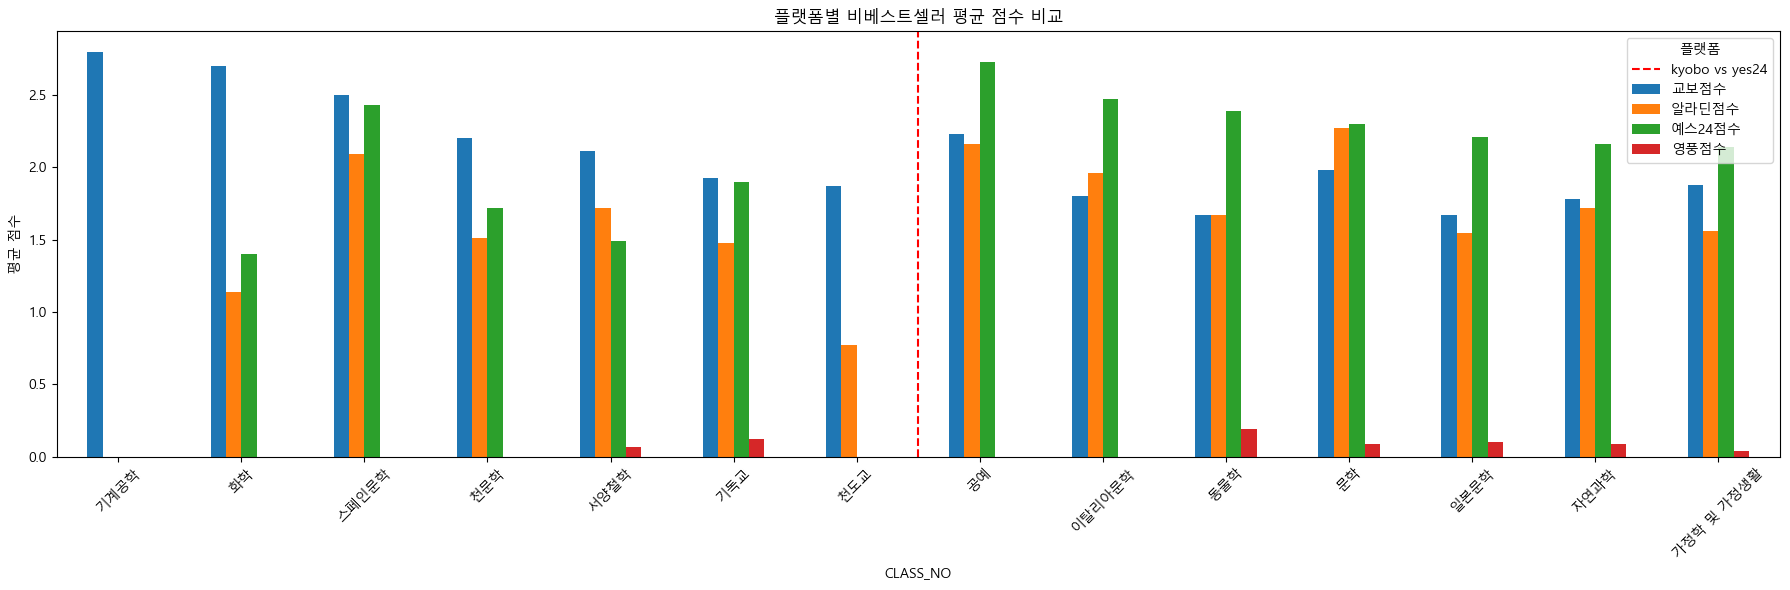

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ kyobo 1위 CLASS_NO 중 상위 7개
top7_kyobo = ranked_df1[ranked_df1['1위'] == 'kyobo'].sort_values(by='1위점수', ascending=False).head(7)['CLASS_NO']

# ✅ yes24 1위 CLASS_NO 중 상위 7개
top7_yes24 = ranked_df1[ranked_df1['1위'] == 'yes24'].sort_values(by='1위점수', ascending=False).head(7)['CLASS_NO']

# ✅ 두 그룹 합치기
selected_classes = pd.concat([top7_kyobo, top7_yes24], ignore_index=True)

# ✅ genre_score_by_platform1에서 해당 CLASS_NO만 가져오기
selected_scores = genre_score_by_platform1.loc[genre_score_by_platform1.index.intersection(selected_classes)]

# ✅ 순서 유지
selected_scores = selected_scores.reindex(selected_classes)

# ✅ 플랫폼 이름 매핑 (필요 시)
platform_rename = {
    'kyobo_score': '교보점수',
    'aladin_score': '알라딘점수',
    'yes24_score': '예스24점수',
    'yp_score': '영풍점수'
}
selected_scores.rename(columns=platform_rename, inplace=True)

# ✅ 시각화
plt.figure(figsize=(18, 6))
selected_scores.plot(kind='bar', ax=plt.gca())

plt.title("플랫폼별 비베스트셀러 평균 점수 비교")
plt.ylabel("평균 점수")
plt.xlabel("CLASS_NO")
plt.xticks(rotation=45)

# ✅ kyobo vs yes24 구분선
plt.axvline(x=6.5, color='red', linestyle='--', label='kyobo vs yes24')

plt.legend(title="플랫폼")
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
df = pd.read_csv('리뷰최종_예사베스트.csv')

In [17]:
df[(df['rating'] == 3) & (df['sentiment'] == '긍정')]['review'][120:140]

152      너무나 잘봤습니다 감사합니다내용이 정말로 좋네요
153                      잘봤습니 재밌었어요
154               제목이 안티랄까 암튼 명작입니다
155              인간의 통찰력에 또 한번 놀랍니다
157                           흥미롭네요
158                         재밌게봤습니다
159                            진짜절망
160                     흥미로운 이야기입니다
161                  읽을 가치가 있는 책입니다
163                         최고의 심리서
165          세계문학전집 필수책이라서 구입해보았습니다
166              고전이 고전인 이유를 알게 해준다
167                 기대하며 읽게 되는 책입니다
168                           잘읽을께요
169                 파리대왕 기대되는 작품입니다
170                    잘 받아서 보고 있어요
171                  읽을수로 다시 읽고싶은 책
172            많은 생각을 하게 하네요 잘읽었습니다
173                    많은 생각을 하게되네요
174    1800년대 판 초 미니멀리즘의 선구주자이자 자연인
Name: review, dtype: object

# 평가점수와 베스트셀러 여부간의 관계가 있을까?

In [11]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전12.csv')
df1 = pd.read_csv('비베스트셀러_최종버전11.csv')

In [14]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [15]:
import pandas as pd

# 예시: df라는 DataFrame이 이미 존재한다고 가정

# 각 플랫폼 이름
platforms = ['kyobo', 'aladin', 'yes24', 'yp']

# 결과 저장용 딕셔너리
correlations = {}

# 각 플랫폼에 대해 best와 score 간 상관계수 계산
for platform in platforms:
    best_col = f'{platform}_best'
    score_col = f'{platform}_score'
    
    # 해당 열이 존재할 경우에만 계산
    if best_col in df.columns and score_col in df.columns:
        # 결측값 제거 후 상관계수 계산
        corr = df[[best_col, score_col]].dropna().corr().iloc[0, 1]
        correlations[platform] = corr

# 결과 출력
for platform, corr in correlations.items():
    print(f"{platform}의 'best'와 'score' 간 상관계수: {corr:.4f}")


kyobo의 'best'와 'score' 간 상관계수: 0.3301
aladin의 'best'와 'score' 간 상관계수: -0.0069
yes24의 'best'와 'score' 간 상관계수: 0.0705
yp의 'best'와 'score' 간 상관계수: 0.2661


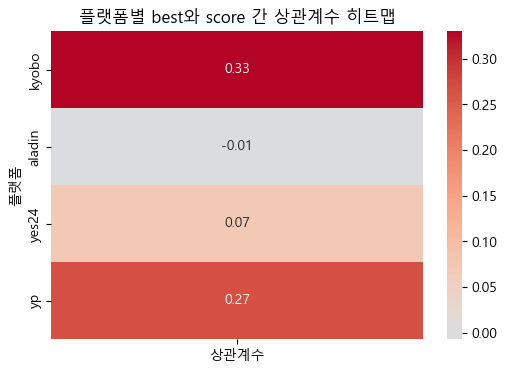

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: df라는 DataFrame이 있다고 가정
# 각 플랫폼 이름
platforms = ['kyobo', 'aladin', 'yes24', 'yp']

# 상관계수 저장할 딕셔너리
correlation_data = {}

# 플랫폼별 상관계수 계산
for platform in platforms:
    best_col = f'{platform}_best'
    score_col = f'{platform}_score'
    
    if best_col in df.columns and score_col in df.columns:
        # 결측값 제거 후 상관계수 계산
        corr = df[[best_col, score_col]].dropna().corr().iloc[0, 1]
        correlation_data[platform] = corr

# 상관계수 DataFrame 생성
corr_df = pd.DataFrame.from_dict(correlation_data, orient='index', columns=['상관계수'])

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title("플랫폼별 best와 score 간 상관계수 히트맵")
plt.ylabel("플랫폼")
plt.show()


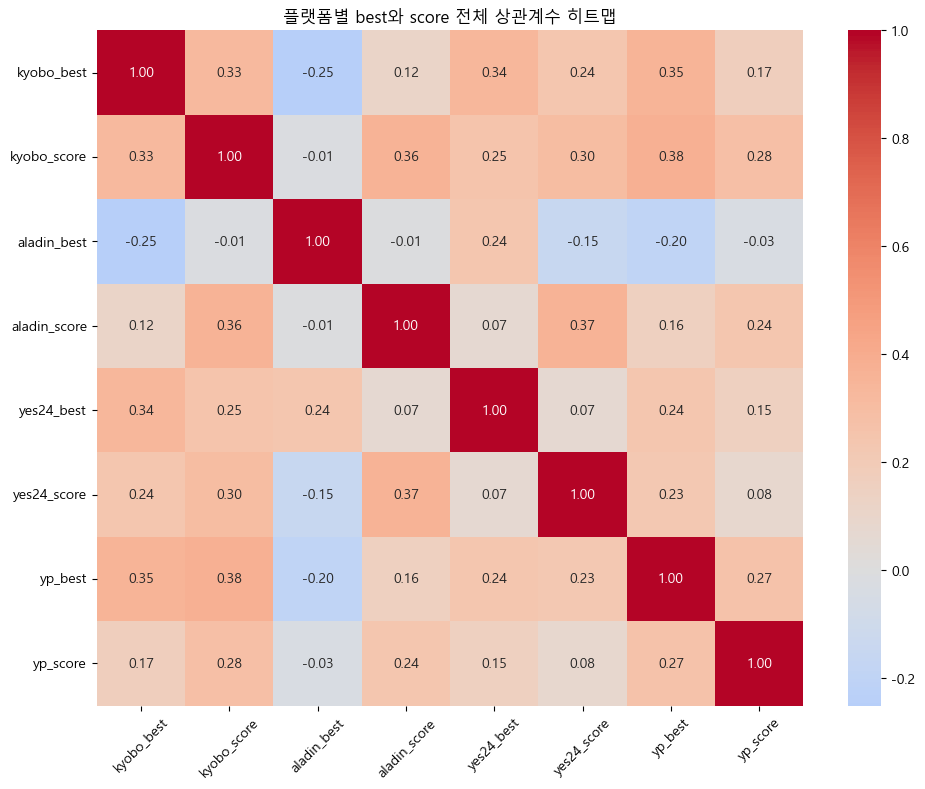

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사용할 열 리스트 정의
columns = [
    'kyobo_best', 'kyobo_score',
    'aladin_best', 'aladin_score',
    'yes24_best', 'yes24_score',
    'yp_best', 'yp_score'
]

# 해당 열들만 추출 + 결측값 제거
corr_df = df[columns].dropna()

# 상관계수 행렬 계산
corr_matrix = corr_df.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("플랫폼별 best와 score 전체 상관계수 히트맵")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 가설2 상관계수

In [20]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [27]:
asd = pd.concat([df, df1])

In [28]:
test = asd[['ISBN','kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']]

In [29]:
test

,ISBN,kyobo_best,aladin_best,yes24_best,yp_best
0,9788956605418,0.0,1.0,1.0,0.0
1,9788932020006,1.0,0.0,1.0,1.0
2,9788956604992,1.0,1.0,1.0,1.0
3,9788954617383,0.0,1.0,0.0,0.0
4,9788937886966,1.0,1.0,1.0,0.0
...,...,...,...,...,...
5138,9788926812778,0.0,0.0,0.0,0.0
5139,9788973386062,0.0,0.0,0.0,0.0
5140,9788992404891,0.0,0.0,0.0,0.0
5141,9788960541894,0.0,0.0,0.0,0.0


In [45]:
df2 = pd.read_csv('리뷰최종_교보베스트.csv')
df3 = pd.read_csv('리뷰최종_교보비베스트.csv')
df_ky = pd.concat([df2, df3])
df4 = pd.read_csv('리뷰최종_알라딘베스트.csv')
df5 = pd.read_csv('리뷰최종_알라딘비베스트.csv')
df_al = pd.concat([df4, df5])
df6 = pd.read_csv('리뷰최종_예사베스트.csv')
df7 = pd.read_csv('리뷰최종_예사비베스트.csv')
df_ys = pd.concat([df6, df7])
df8 = pd.read_csv('리뷰최종_영풍베스트.csv')
df9 = pd.read_csv('리뷰최종_영풍비베스트.csv')
df_yp = pd.concat([df8, df9])

In [51]:
import pandas as pd

# 1. 리뷰 총 갯수 (ISBN별)
total_reviews = df_yp.groupby('isbn').size().rename('total_reviews')

# 2. 긍정 리뷰 수
positive_reviews = df_yp[df_yp['sentiment'] == '긍정'].groupby('isbn').size().rename('positive_reviews')

# 3. 부정 리뷰 수
negative_reviews = df_yp[df_yp['sentiment'] == '부정'].groupby('isbn').size().rename('negative_reviews')

# 4. 모두 합치기
result_df = pd.concat([total_reviews, positive_reviews, negative_reviews], axis=1).fillna(0).astype(int)

# 5. 인덱스를 ISBN 컬럼으로 변환하고 이름 바꾸기
result_df = result_df.reset_index().rename(columns={'isbn': 'ISBN'})

# 결과 확인
result_df

,ISBN,total_reviews,positive_reviews,negative_reviews
0,9788901052960,1,1,0
1,9788901086491,1,1,0
2,9788901097732,1,1,0
3,9788901215037,1,1,0
4,9788901223032,3,3,0
...,...,...,...,...
1400,9791198889607,3,3,0
1401,9791198933201,1,0,1
1402,9791198987600,7,7,0
1403,9791199015807,2,2,0


In [52]:
# 1. 매핑 대상 딕셔너리 만들기
review_map = result_df.set_index('ISBN')['total_reviews'].to_dict()
po_map = result_df.set_index('ISBN')['positive_reviews'].to_dict()
ne_map = result_df.set_index('ISBN')['negative_reviews'].to_dict()

# 2. test 데이터프레임에 열 추가
test['yp_review'] = test['ISBN'].map(review_map)
test['yp_po'] = test['ISBN'].map(po_map)
test['yp_ne'] = test['ISBN'].map(ne_map)

# 3. 결측값(매핑 안 된 ISBN)은 0으로 처리
test[['yp_review', 'yp_po', 'yp_ne']] = test[['yp_review', 'yp_po', 'yp_ne']].fillna(0).astype(int)

# 결과 확인
test


C:\Users\user\AppData\Local\Temp\ipykernel_7276\2562684517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yp_review'] = test['ISBN'].map(review_map)
C:\Users\user\AppData\Local\Temp\ipykernel_7276\2562684517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yp_po'] = test['ISBN'].map(po_map)
C:\Users\user\AppData\Local\Temp\ipykernel_7276\2562684517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,ISBN,kyobo_best,aladin_best,yes24_best,yp_best,kyobo_review,kyobo_po,kyobo_ne,aladin_review,aladin_po,aladin_ne,yes24_review,yes24_po,yes24_ne,yp_review,yp_po,yp_ne
0,9788956605418,0.0,1.0,1.0,0.0,271,251,20,100,85,15,117,104,13,0,0,0
1,9788932020006,1.0,0.0,1.0,1.0,107,97,10,45,37,8,97,84,13,4,4,0
2,9788956604992,1.0,1.0,1.0,1.0,328,292,36,159,111,48,99,84,15,7,4,3
3,9788954617383,0.0,1.0,0.0,0.0,9,9,0,39,33,6,23,16,7,0,0,0
4,9788937886966,1.0,1.0,1.0,0.0,213,200,13,12,11,1,110,102,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,9788926812778,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
5139,9788973386062,0.0,0.0,0.0,0.0,2,1,1,0,0,0,0,0,0,0,0,0
5140,9788992404891,0.0,0.0,0.0,0.0,1,1,0,3,2,1,1,1,0,0,0,0
5141,9788960541894,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
test.columns

Index(['ISBN', 'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best',
       'kyobo_review', 'kyobo_po', 'kyobo_ne', 'aladin_review', 'aladin_po',
       'aladin_ne', 'yes24_review', 'yes24_po', 'yes24_ne', 'yp_review',
       'yp_po', 'yp_ne'],
      dtype='object')

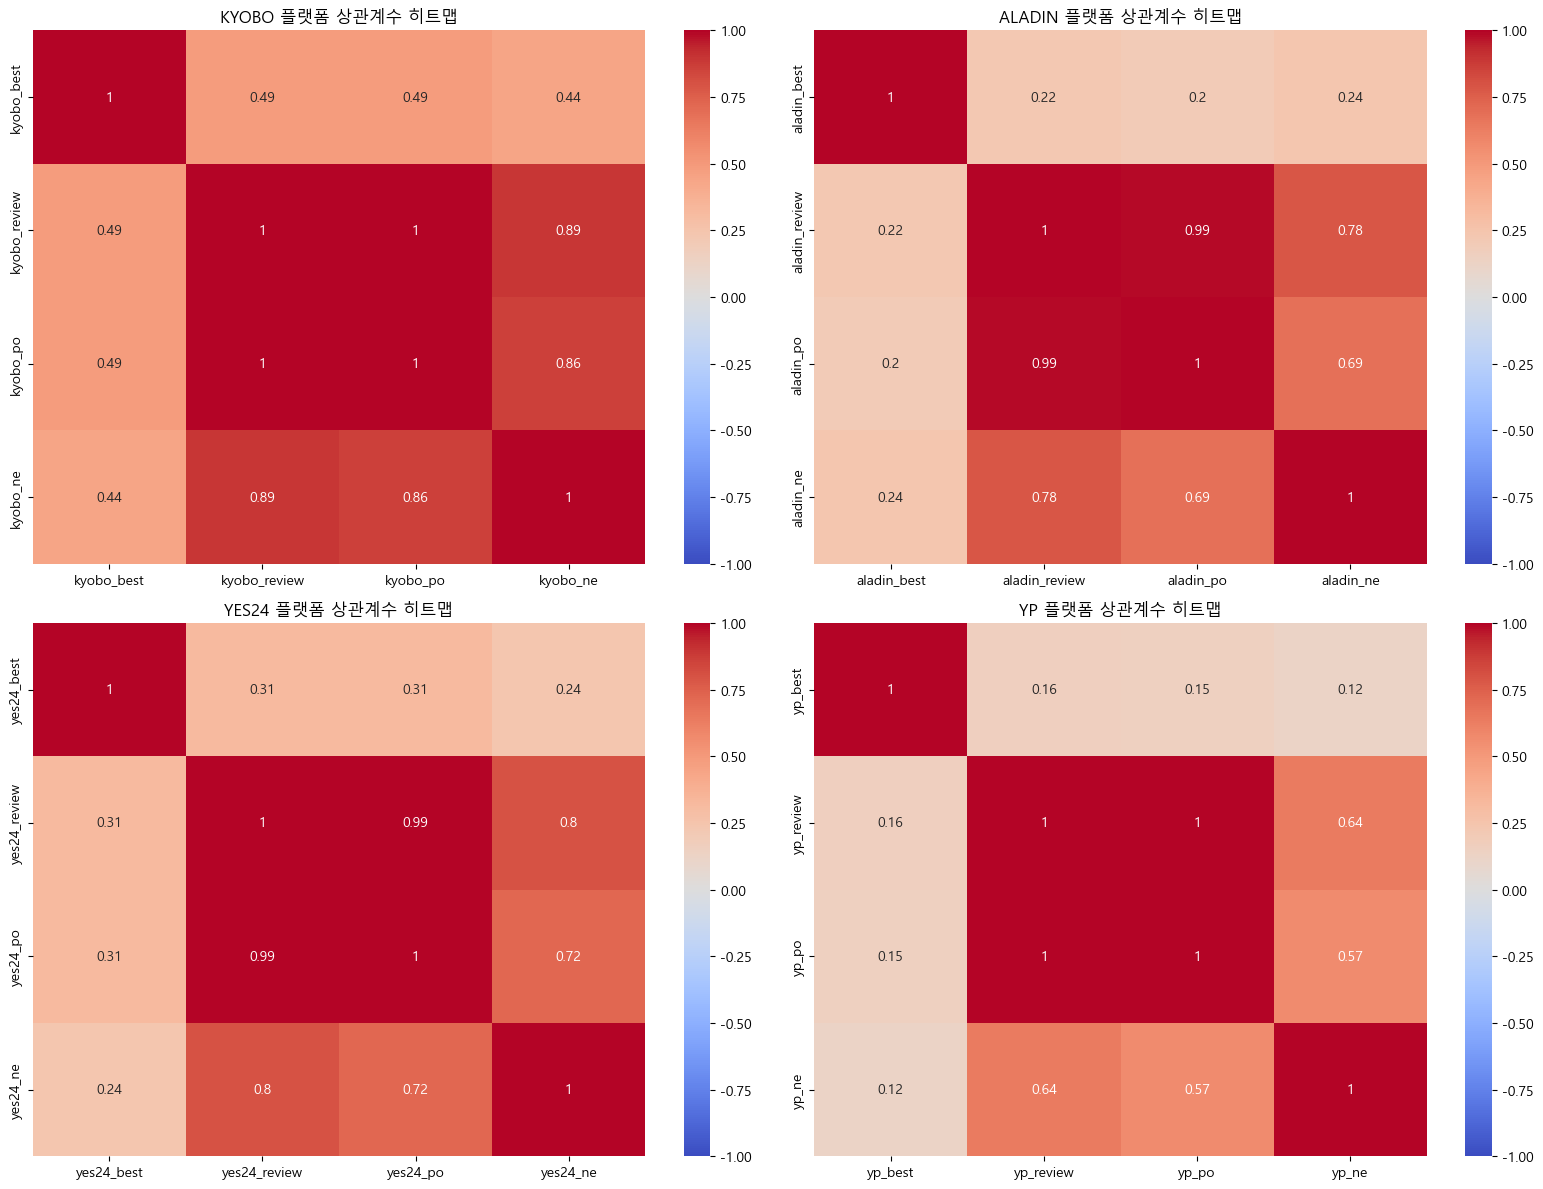

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 플랫폼별 접두어
platforms = ['kyobo', 'aladin', 'yes24', 'yp']

# 시각화
plt.figure(figsize=(16, 12))  # 전체 크기 설정

for i, platform in enumerate(platforms, 1):
    cols = [f'{platform}_best', f'{platform}_review', f'{platform}_po', f'{platform}_ne']
    corr = test[cols].corr()  # 상관계수 계산

    # subplot으로 히트맵 그리기
    plt.subplot(2, 2, i)
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{platform.upper()} 플랫폼 상관계수 히트맵')

plt.tight_layout()
plt.show()


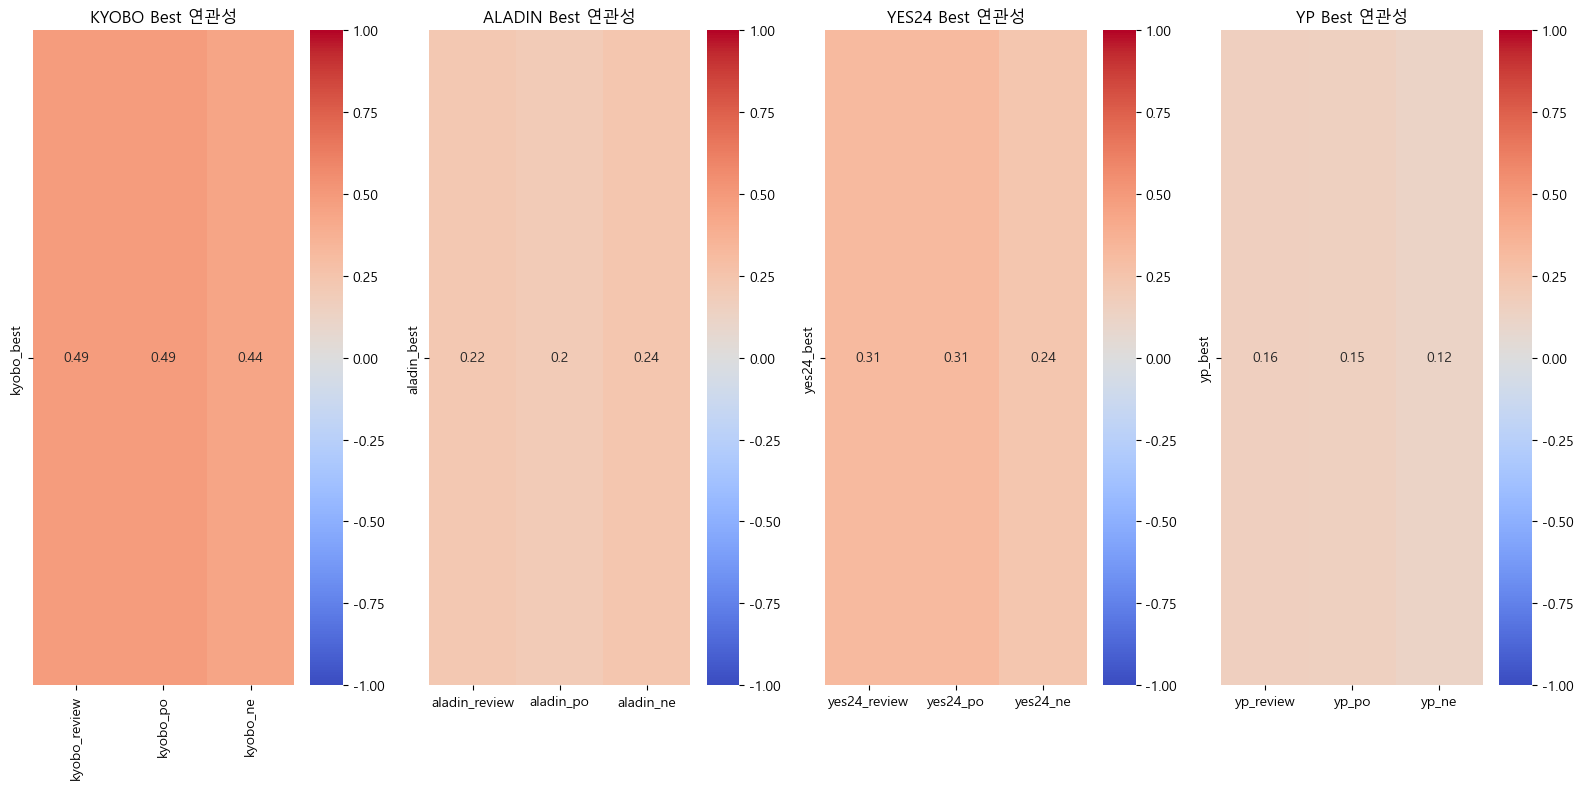

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 플랫폼별 접두어
platforms = ['kyobo', 'aladin', 'yes24', 'yp']

# 시각화
plt.figure(figsize=(16, 8))  # 가로로 배치할 예정

for i, platform in enumerate(platforms, 1):
    best_col = f'{platform}_best'
    related_cols = [f'{platform}_review', f'{platform}_po', f'{platform}_ne']
    
    # 상관계수 계산 (best와 나머지 3개만)
    subset = test[[best_col] + related_cols]
    corr_with_best = subset.corr().loc[[best_col], related_cols]

    # 히트맵 시각화
    plt.subplot(1, 4, i)
    sns.heatmap(corr_with_best, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{platform.upper()} Best 연관성')

plt.tight_layout()
plt.show()


import pandas as pd
# 교보
df = pd.read_csv('리뷰최종_교보베스트.csv')
df1 = pd.read_csv('리뷰최종_교보비베스트.csv')
test = pd.concat([df,df1])
교보_베스트_단어빈도.csv
교보_비베스트_단어빈도.csv
교보_통합_단어빈도.csv

# 알라딘
df_al = pd.read_csv('리뷰최종_알라딘베스트.csv')
df_al1 = pd.read_csv('리뷰최종_알라딘비베스트.csv')
test1 = pd.concat([df_al, df_al1])
알라딘_베스트_단어빈도.csv
알라딘_비베스트_단어빈도.csv
알라딘_통합_단어빈도.csv

# 예사
df_ys = pd.read_csv('리뷰최종_예사베스트.csv')
df_ys1 = pd.read_csv('리뷰최종_예사비베스트.csv')
test2 = pd.concat([df_ys, df_ys1])
예스24_베스트_단어빈도.csv
예스24_비베스트_단어빈도.csv
예스24_통합_단어빈도.csv

# 영풍
df_yp = pd.read_csv('리뷰최종_영풍베스트.csv')
df_yp1 = pd.read_csv('리뷰최종_영풍비베스트.csv')
test3 = pd.concat([df_yp, df_yp1])
영풍_베스트_단어빈도.csv
영풍_비베스트_단어빈도.csv
영풍_통합_단어빈도.csv